In [25]:
import numpy as np

import os
from glob import glob
from tqdm import tqdm

def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)

import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

import pandas as pd
import pickle as pkl

from hepstats.modeling import bayesian_blocks

In [2]:
path_to_usdb_csv = './sd_GT_complete.csv'
df_usdb = pd.read_csv(path_to_usdb_csv)

In [3]:
usdbmil = np.loadtxt('/p/lustre2/fox39/shmuq/usdbmil.vec',skiprows=1)
usdb = np.loadtxt('/p/lustre2/fox39/shmuq/usdb.vec',skiprows=1)

In [4]:
n_transitions = len(df_usdb[df_usdb['include']==True])
print('# transitions =', n_transitions)

# transitions = 56


In [5]:
gA = 1.28

df_usdb['Bth_gA2'] = df_usdb['Bth']*gA**2
df_usdb['Berr_gA2'] = df_usdb['Bexp']-df_usdb['Bth_gA2']-1.0*df_usdb['Tmirror']
df_usdb['Berr'] = df_usdb['Bexp']-df_usdb['Bth']-1.0*df_usdb['Tmirror']


Simply using $g_A$ at the free-nucleon value, unquenched, we have this distribution of absolute errors for B(GT)

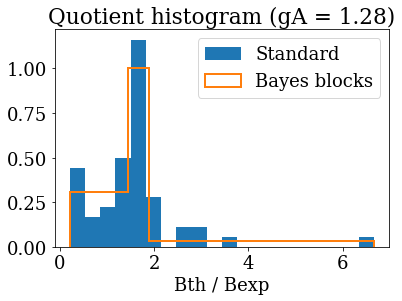

In [26]:
y = np.array(df_usdb['Bth_gA2'] / df_usdb['Bexp'])
blocks = bayesian_blocks(y)
plt.hist(y, bins=optimal_n_bins(y), density=True, label='Standard')
plt.hist(y, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks')
plt.title(f'Quotient histogram (gA = {gA})')
plt.xlabel('Bth / Bexp')
plt.legend()
plt.show()

In [7]:
from scipy.optimize import minimize

def objective(dBap,q,df):
    chi_squared = np.sum((df['Bexp']-q**2*df['Bth_gA2']-1.0*df['Tmirror'])**2/(df['sigma_B']**2 + dBap**2)) 
    dof = n_transitions - 1
    return (chi_squared/dof - 1)**2

dBap = minimize(objective,x0=0.5,args=(0.77,df_usdb)).x[0]

In [8]:
print('a priori B(GT) std. dev. =', dBap)
print('a priori B(GT) variance =', dBap**2)

a priori B(GT) std. dev. = -0.08135511646323804
a priori B(GT) variance = 0.006618654974747024


In [9]:
df_usdb['Bresid'] = df_usdb['Berr']/np.sqrt(df_usdb['sigma_B']**2 + dBap**2)
df_usdb['Bresid_gA2'] = (df_usdb['Bexp']-df_usdb['Bth_gA2']-1.0*df_usdb['Tmirror'])/np.sqrt(df_usdb['sigma_B']**2 + dBap**2)

In [10]:
# data_path = '/p/lustre2/fox39/shmuq/batch_results'
# run_dir_list = []
# for batch_dir in sorted(glob(os.path.join(data_path,'batch_job*'))):
# #     print(batch_dir)
#     for run_dir in sorted(glob(os.path.join(batch_dir,'run_usdb_rand?????'))):
#         run_dir_list.append(run_dir)
#         print(run_dir)

In [11]:
# print(len(run_dir_list))
# for i in range(1,10000):
#     if f'rand{i:05}' not in run_dir_list[i-1]:
#         print(i,run_dir_list[i-1])

In [12]:
# run_dir_list_trunc = run_dir_list[:10000]

In [13]:
# n_params = 66
# n_samples = len(run_dir_list_trunc)
# df_dict = {}
# int_vec_array = np.zeros(shape=(n_samples,n_params))
# mil_vec_array = np.zeros(shape=(n_samples,n_params))
# for run_dir in tqdm(run_dir_list_trunc):
#     run_num_string = run_dir.split('rand')[-1]
#     run_num = int(run_num_string)-1
#     df_dict[run_num_string] = pd.read_csv(os.path.join(run_dir,f'sd_GT_usdb_rand{run_num_string}_complete.csv'))
#     int_vec_array[run_num,:] = np.loadtxt(os.path.join(run_dir,f'usdb_rand{run_num_string}.vec'),skiprows=1)
#     mil_vec_array[run_num,:] = np.loadtxt(os.path.join(run_dir,f'usdbmil_rand{run_num_string}.vec'),skiprows=1)

In [14]:
# with open('gt_results_10k_210222.pkl','wb') as fh:
#     pkl.dump([df_dict,int_vec_array,mil_vec_array],fh)
with open('gt_results_10k_210222.pkl','rb') as fh:
    [df_dict,int_vec_array,mil_vec_array] = pkl.load(fh)

In [15]:
# need to fix sample 09226, did not finish
del df_dict['09226']
mil_vec_array=np.delete(mil_vec_array,9226,0)
int_vec_array=np.delete(int_vec_array,9226,0)

In [16]:
n_params = 66
n_samples = len(df_dict.keys())
print('n samples =', n_samples)

n samples = 9997


In [17]:
len(mil_vec_array)

9998

In [18]:
def bayesian_blocks_mod(y):
    tol = np.std(y)/100
    blocks = bayesian_blocks(y)
    diffs = np.diff(blocks)
    mask = np.ones(len(blocks),dtype=bool)
    for i,d in enumerate(diffs):
        if d<tol:
            print(f'Deleting one bin: width = {d}')
            mask[i] = False
    return blocks[mask,...]

### PCA-parameter sample distributions
Note that below each is 1/variance = Hessian eigenvalue.

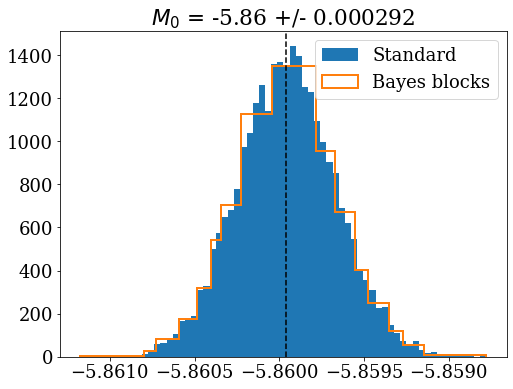

1/variance =  11714566.391056199
[-5.86117343 -5.86079611 -5.86072586 -5.86059106 -5.86048537 -5.86040426
 -5.86034233 -5.86022634 -5.86004524 -5.85978119 -5.85966879 -5.85955328
 -5.85947562 -5.85935452 -5.85927148 -5.85914607 -5.85877717]


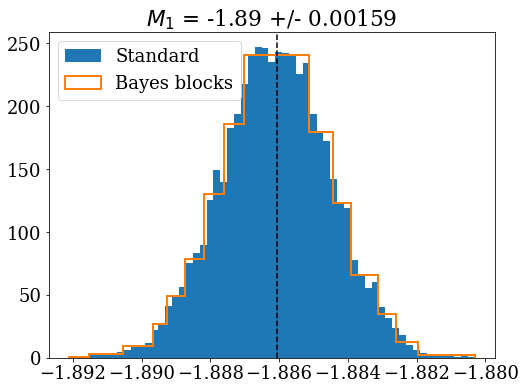

1/variance =  395985.81245735503
[-1.89211056 -1.891533   -1.89054892 -1.88966145 -1.88926116 -1.88872569
 -1.88818303 -1.88759366 -1.88702219 -1.88514083 -1.88442994 -1.88391052
 -1.88312499 -1.88259236 -1.88195803 -1.88030471]


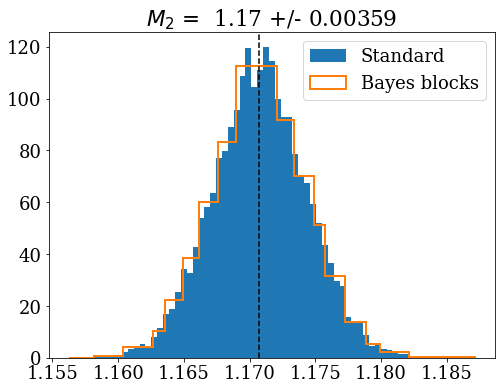

1/variance =  77458.829006114
[1.15625482 1.15819334 1.16038816 1.16265294 1.16356495 1.16495226
 1.16612355 1.16762659 1.1689423  1.17209861 1.17338569 1.17486992
 1.17571734 1.17727031 1.17887104 1.17989149 1.18208672 1.18712501]
Deleting one bin: width = 2.1244682049115227e-06
Deleting one bin: width = 4.7238007949701455e-06


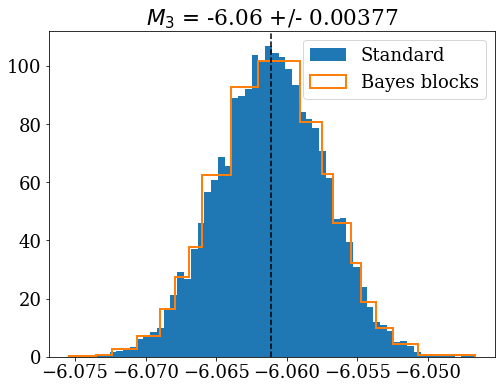

1/variance =  70444.3963754747
[-6.07541951 -6.0735369  -6.07234491 -6.0706161  -6.06899653 -6.06794472
 -6.06691818 -6.06599033 -6.06392602 -6.06207224 -6.05907812 -6.05751289
 -6.05676643 -6.05547302 -6.05474941 -6.05371162 -6.0524641  -6.05071534
 -6.04669515]


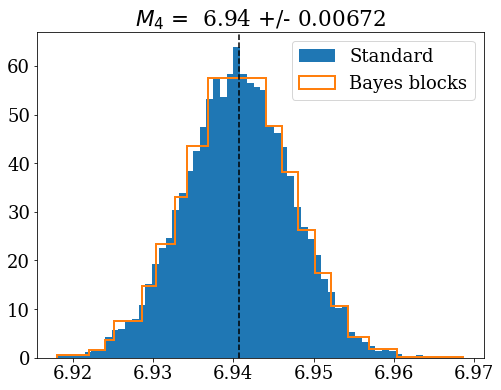

1/variance =  22114.95331088185
[6.91809073 6.92205945 6.92400801 6.92516482 6.92861943 6.93032741
 6.93269268 6.93422682 6.93680211 6.9440205  6.94604628 6.9480325
 6.95016998 6.95223467 6.95431356 6.95692752 6.96035506 6.96866242]
Deleting one bin: width = 9.431882014965254e-06


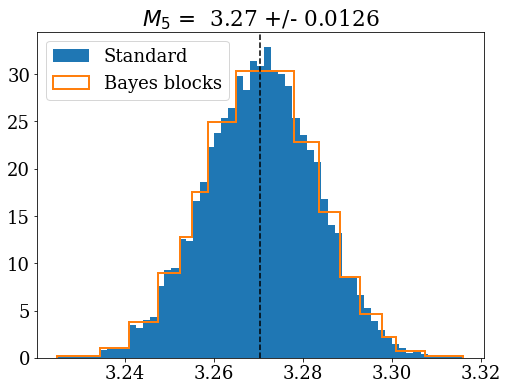

1/variance =  6341.363631240396
[3.22490929 3.2344372  3.24089921 3.24758179 3.25246583 3.2551409
 3.25877057 3.26509042 3.27811345 3.28362469 3.2882285  3.292813
 3.29765216 3.30100599 3.30748205 3.31601888]


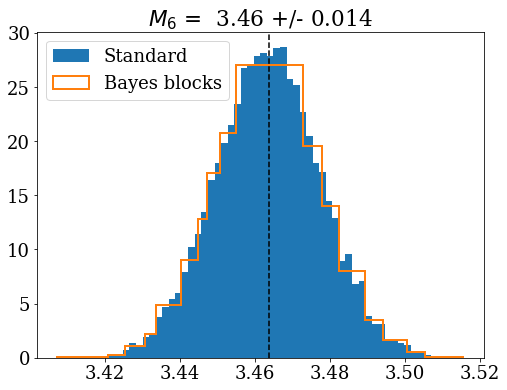

1/variance =  5119.54038786966
[3.40726151 3.42065987 3.42516185 3.43051954 3.43364761 3.4401165
 3.44463755 3.44726999 3.45073109 3.45499612 3.47272667 3.477853
 3.4825203  3.48935849 3.494244   3.50056556 3.50547644 3.51559048]


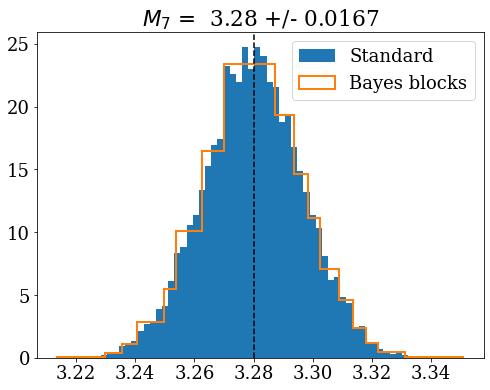

1/variance =  3568.809234254997
[3.21370062 3.22976023 3.23540222 3.2405185  3.24967022 3.25360041
 3.26242151 3.27003188 3.28726999 3.29371549 3.2984374  3.30250906
 3.30888896 3.31344519 3.31807108 3.32193138 3.33112673 3.35088829]
Deleting one bin: width = 4.233892157978758e-05


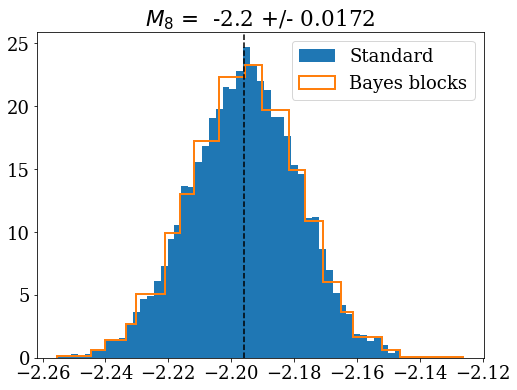

1/variance =  3375.388386033258
[-2.25527043 -2.24450968 -2.24015561 -2.23352821 -2.23042903 -2.22106234
 -2.21631273 -2.21194082 -2.20380797 -2.19577182 -2.19017359 -2.18161455
 -2.17655284 -2.17078611 -2.16492995 -2.16135377 -2.15203725 -2.1462563
 -2.12617839]


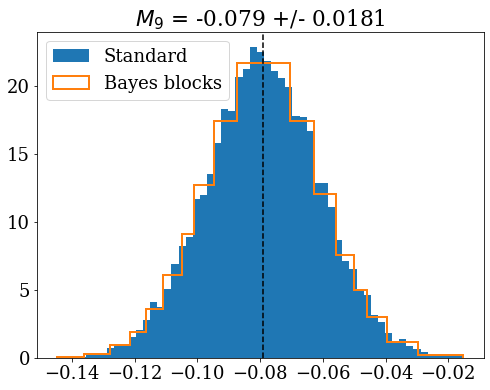

1/variance =  3046.416116540096
[-0.14454749 -0.13610375 -0.12792658 -0.12152193 -0.11630834 -0.11098774
 -0.10475843 -0.10097423 -0.094628   -0.08719597 -0.07034246 -0.06280042
 -0.05565956 -0.04993838 -0.04578818 -0.03947065 -0.02969665 -0.01522264]
Deleting one bin: width = 5.611201198529869e-05


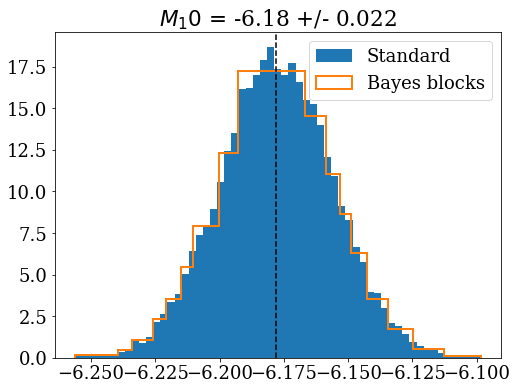

1/variance =  2060.7954818148664
[-6.25628647 -6.23954287 -6.2341653  -6.22591572 -6.22065443 -6.21488448
 -6.21037273 -6.20028165 -6.192917   -6.16689314 -6.15874324 -6.15307718
 -6.14883451 -6.14249423 -6.1345211  -6.12468428 -6.11286566 -6.0984436 ]


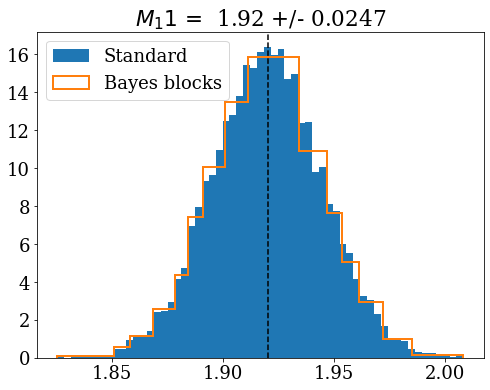

1/variance =  1635.79092688913
[1.82563237 1.85099178 1.85810342 1.86838256 1.87858751 1.88414487
 1.89094537 1.90079922 1.91113555 1.93438862 1.94690282 1.95361675
 1.96109663 1.97190672 1.98515199 2.00822944]
Deleting one bin: width = 3.46166098980083e-07


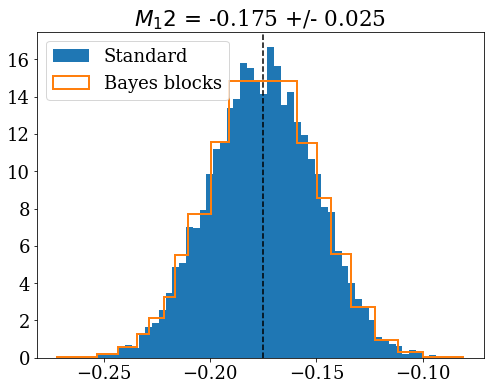

1/variance =  1594.845560415165
[-0.27192454 -0.2533615  -0.24357422 -0.23426497 -0.22898734 -0.22160518
 -0.21669431 -0.21036697 -0.19974918 -0.19109772 -0.15931624 -0.14987068
 -0.14305072 -0.13351268 -0.12250083 -0.11138109 -0.09969151 -0.08085476]


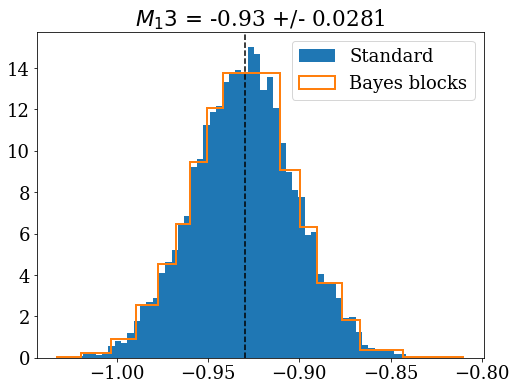

1/variance =  1270.5373727663805
[-1.03247548 -1.01977252 -1.00297956 -0.98931489 -0.97746346 -0.96736468
 -0.95983828 -0.95082374 -0.94184903 -0.91065029 -0.89971447 -0.8902525
 -0.87688335 -0.86659317 -0.84318095 -0.81019767]


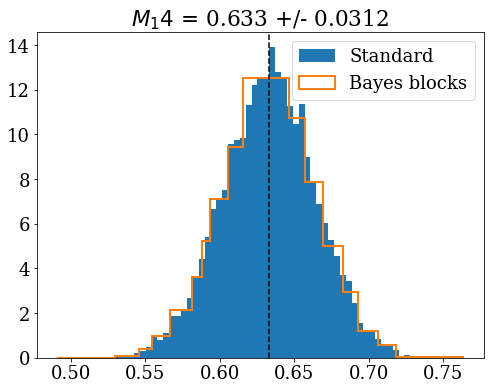

1/variance =  1030.453838711221
[0.49110358 0.52966342 0.5460798  0.55475118 0.56689667 0.58130776
 0.58786569 0.59351235 0.60560384 0.61597063 0.64653937 0.65698395
 0.66943171 0.68247475 0.69304846 0.70647083 0.71803601 0.76355735]


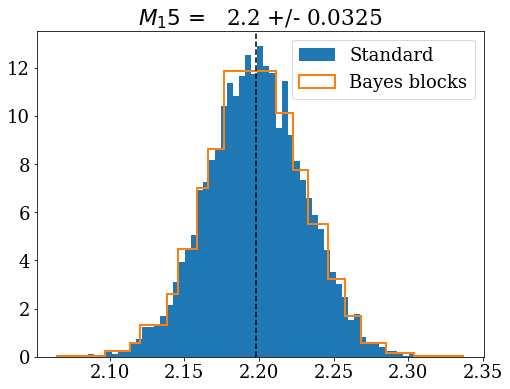

1/variance =  944.0999939637122
[2.06503877 2.09718467 2.11373954 2.120393   2.1382245  2.14576109
 2.15856219 2.16611044 2.17666955 2.211395   2.22264048 2.23284926
 2.24619684 2.25760251 2.26810561 2.28473864 2.3037317  2.3368466 ]


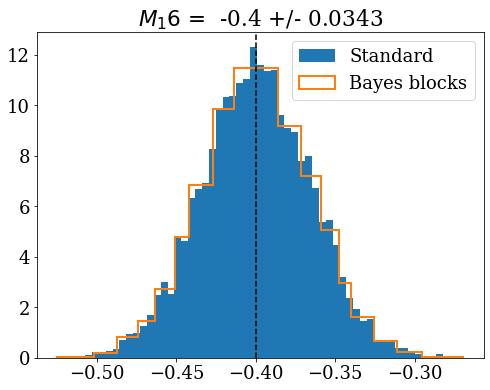

1/variance =  852.2107807720511
[-0.52492254 -0.50173893 -0.48759066 -0.474142   -0.46357555 -0.45111465
 -0.44219189 -0.42686223 -0.41381453 -0.38607243 -0.37181192 -0.35923771
 -0.34765978 -0.33985381 -0.32572758 -0.3112587  -0.29528798 -0.26933299]


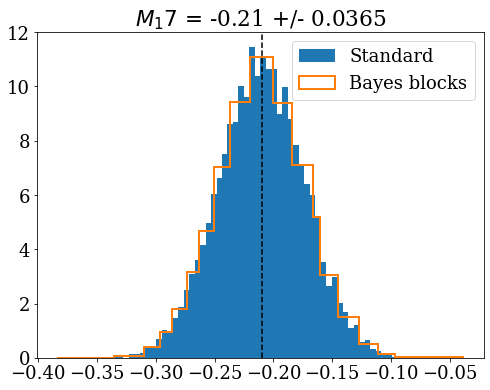

1/variance =  751.6364751149309
[-0.38344692 -0.3354085  -0.31025474 -0.2965853  -0.28587514 -0.27363927
 -0.26358929 -0.25067855 -0.23718713 -0.22030759 -0.20005021 -0.18424134
 -0.16661269 -0.16025393 -0.14524814 -0.12769331 -0.11143667 -0.09707353
 -0.03878469]


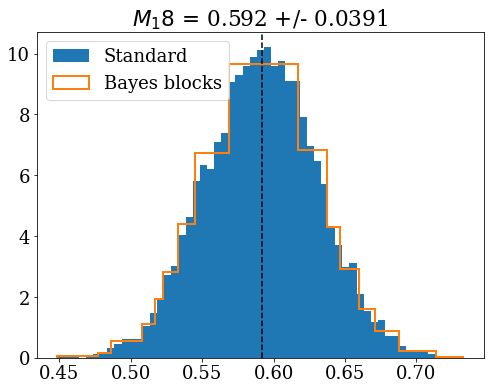

1/variance =  652.7327754236767
[0.44861659 0.47708888 0.4860349  0.50801032 0.51708194 0.5226489
 0.53308716 0.54525525 0.56889616 0.61734354 0.63736537 0.64630331
 0.6597581  0.67126728 0.68757032 0.7135668  0.73282185]


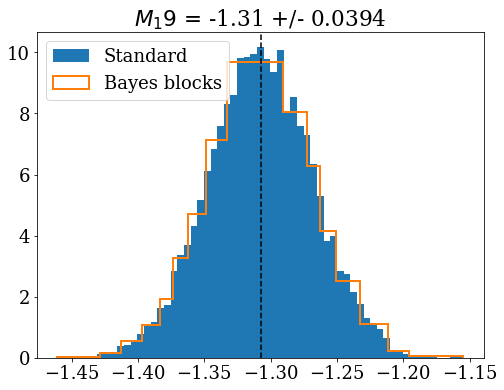

1/variance =  644.9359752294718
[-1.46069644 -1.42849427 -1.41260833 -1.3967039  -1.38340162 -1.37374592
 -1.36240973 -1.34851665 -1.33292078 -1.29064751 -1.27257303 -1.26256719
 -1.25060851 -1.23296144 -1.21117061 -1.1959205  -1.15474866]


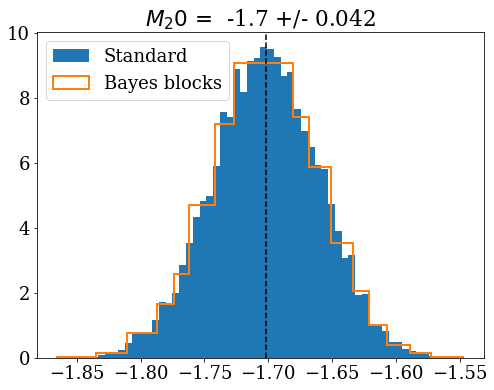

1/variance =  567.8060285347825
[-1.8650364  -1.83485964 -1.81033296 -1.78734511 -1.77355481 -1.76211855
 -1.74150595 -1.72692817 -1.68045062 -1.66806086 -1.65068412 -1.63401792
 -1.62144696 -1.60688977 -1.58886198 -1.57229687 -1.54738073]


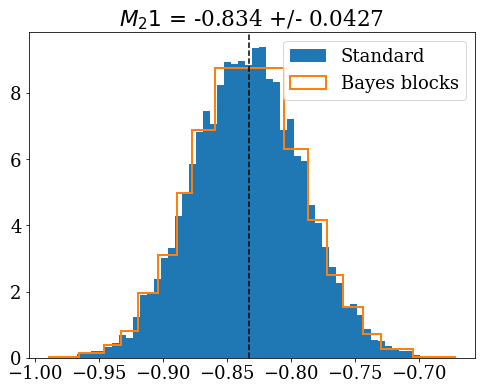

1/variance =  549.3821696757058
[-0.98914084 -0.96587061 -0.94617122 -0.93269822 -0.91962724 -0.90388403
 -0.88875491 -0.87773861 -0.85967001 -0.80531133 -0.78697378 -0.77237668
 -0.75985804 -0.7440133  -0.72997836 -0.70459194 -0.67243283]


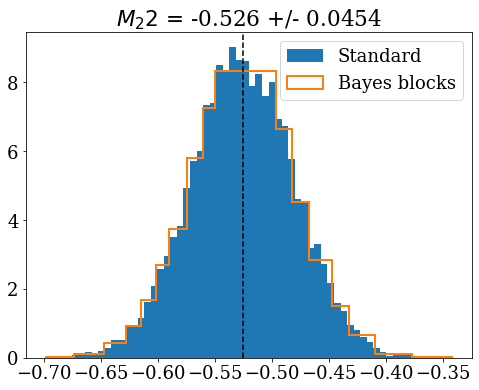

1/variance =  485.93666883431683
[-0.69791649 -0.6731415  -0.64713899 -0.6280532  -0.61504433 -0.60116386
 -0.59059778 -0.57444199 -0.56047715 -0.54966609 -0.49619432 -0.48240893
 -0.46722329 -0.44773766 -0.43216819 -0.40955751 -0.37743483 -0.34252124]
Deleting one bin: width = 0.0002713125502000757


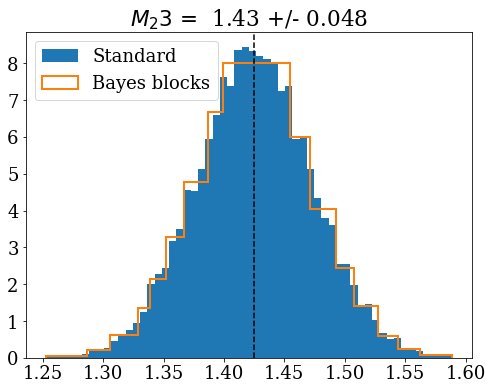

1/variance =  434.61065925522473
[1.25266218 1.28673032 1.30546063 1.32897318 1.33838133 1.35190112
 1.36678929 1.38711931 1.39882277 1.45429353 1.47146096 1.49280894
 1.50791901 1.52730974 1.54387776 1.56216304 1.58855926]
Deleting one bin: width = 0.00034945902790495253


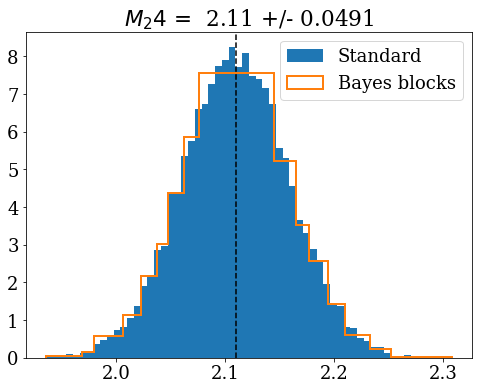

1/variance =  414.1978383402174
[1.93536216 1.96805979 1.97947913 2.00613101 2.02215744 2.03772843
 2.04717802 2.06195493 2.07576951 2.14446273 2.16464102 2.17713654
 2.19461041 2.20966342 2.2328544  2.2519192  2.30797645]


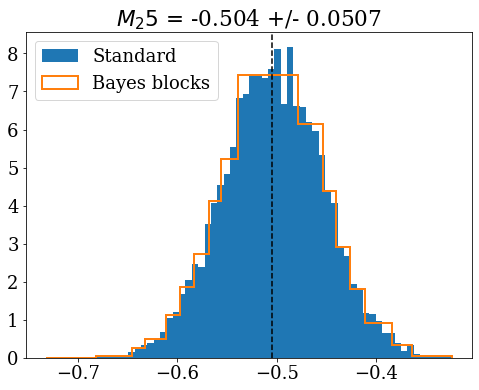

1/variance =  388.8550476498446
[-0.73233428 -0.68161663 -0.64594382 -0.6326616  -0.6116499  -0.59722118
 -0.58376208 -0.56864684 -0.55601907 -0.53902523 -0.47870544 -0.45397541
 -0.44084419 -0.42626573 -0.41160505 -0.38389633 -0.3640289  -0.3238834 ]


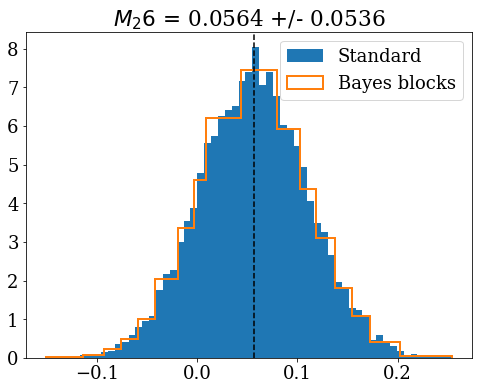

1/variance =  348.41592327780586
[-0.15065015 -0.11425036 -0.09331737 -0.07635037 -0.05856683 -0.0416607
 -0.01928713 -0.00314715  0.00868461  0.04367069  0.08007875  0.10229363
  0.11804959  0.13759399  0.15453769  0.17223063  0.20201634  0.25391916]


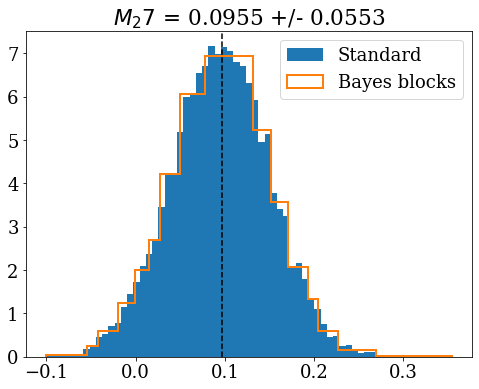

1/variance =  326.8462586048251
[-0.10033556 -0.05457561 -0.04204648 -0.01952748 -0.00095475  0.014885
  0.02730999  0.05022631  0.07730081  0.13177404  0.15135611  0.17069757
  0.19306128  0.20459535  0.22623333  0.26925856  0.35417234]
Deleting one bin: width = 0.00011056996935598917


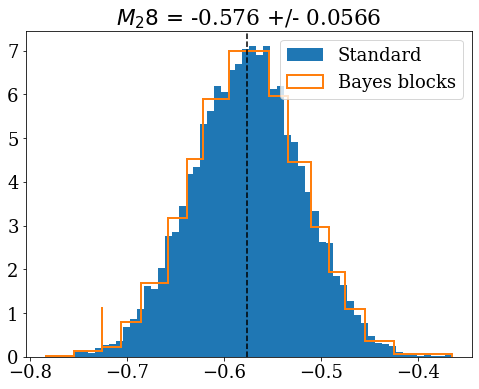

1/variance =  312.4127621677574
[-0.78325589 -0.75421664 -0.72584516 -0.72513569 -0.70607912 -0.68560498
 -0.65805483 -0.63785966 -0.62116002 -0.59422358 -0.5536891  -0.53439112
 -0.51014917 -0.49203463 -0.47555017 -0.45495701 -0.42495494 -0.36514697]


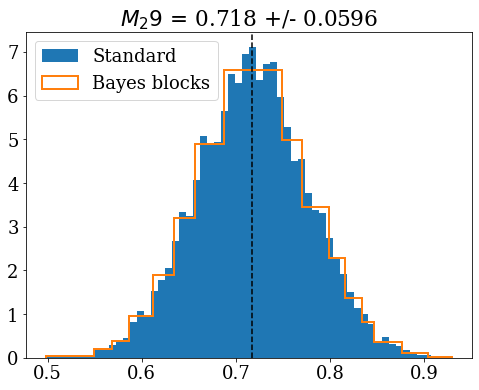

1/variance =  281.5167258996107
[0.49827398 0.54963914 0.56831329 0.58679497 0.61149785 0.63436717
 0.65649945 0.6876751  0.74930672 0.77013473 0.79894924 0.81538592
 0.83374409 0.84681775 0.87649085 0.90380402 0.92929217]


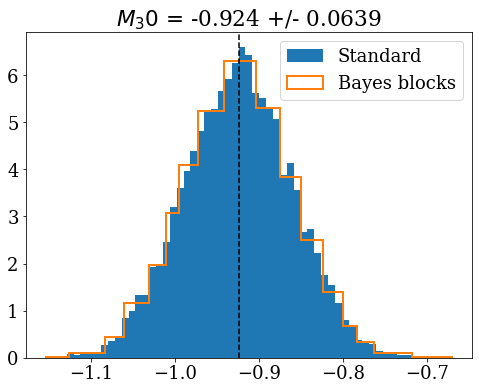

1/variance =  244.931041777603
[-1.15341509 -1.12636717 -1.08286358 -1.06035979 -1.03084788 -1.00992003
 -0.99493302 -0.97202385 -0.94124423 -0.90337384 -0.87517123 -0.84938118
 -0.82377085 -0.79939222 -0.78317697 -0.7624088  -0.71794558 -0.67001106]


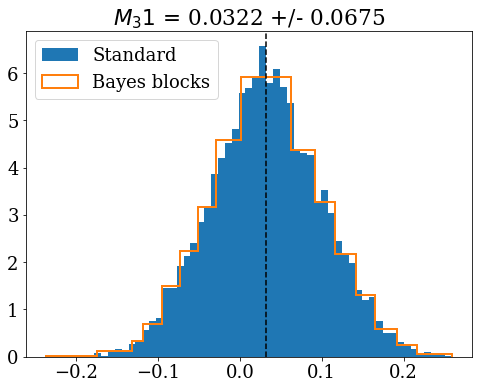

1/variance =  219.32515997584935
[-0.23708663 -0.1741843  -0.1323275  -0.11843378 -0.09482548 -0.07357391
 -0.05165215 -0.0291431   0.00081253  0.06298177  0.09155141  0.11677567
  0.141954    0.16486828  0.19225069  0.21646594  0.25900279]
Deleting one bin: width = 0.0006190253299049875
Deleting one bin: width = 8.704114823498976e-05


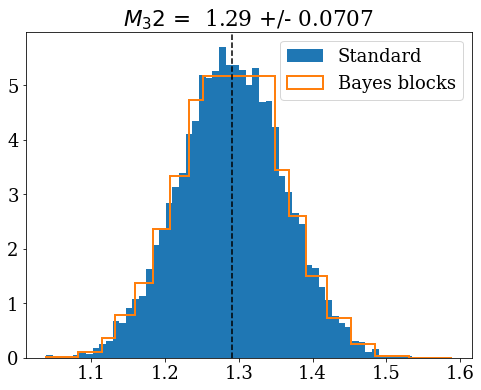

1/variance =  200.17197387125907
[1.0392136  1.08194    1.11448853 1.13241668 1.15940638 1.18408011
 1.20695109 1.23291839 1.25078212 1.34852654 1.3675228  1.39098654
 1.41981889 1.45173041 1.48413807 1.53070075 1.58857903]


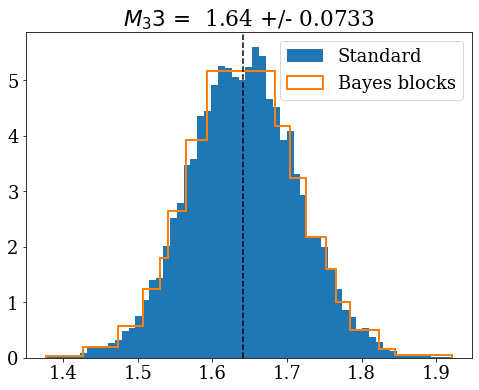

1/variance =  186.29379094085934
[1.37659305 1.42572098 1.47387547 1.5068141  1.52991838 1.54012037
 1.56501966 1.5923474  1.68432419 1.70341704 1.72547922 1.75220849
 1.76543396 1.78460376 1.82283264 1.8453184  1.92114006]


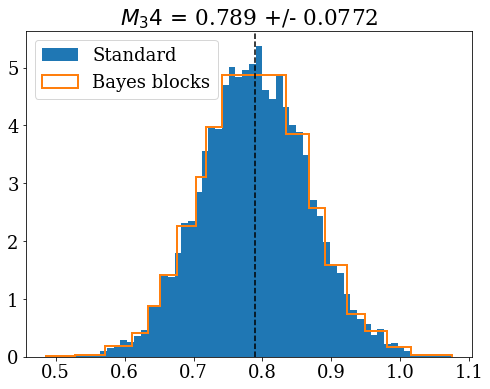

1/variance =  167.93268271013127
[0.48580906 0.52733733 0.57169663 0.61018927 0.63451661 0.65065148
 0.67645817 0.70361013 0.71763299 0.7414122  0.83428851 0.8672011
 0.8903754  0.92206737 0.94944373 0.98029354 1.01561666 1.07475664]


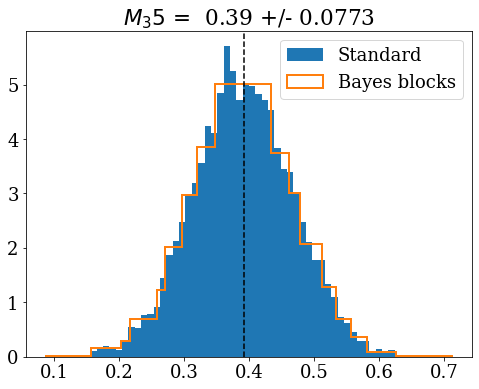

1/variance =  167.4197770890241
[0.08691459 0.15593433 0.20281485 0.21653342 0.25819674 0.27059317
 0.29700612 0.31935706 0.34758651 0.43404235 0.46194481 0.47802082
 0.51252686 0.5340894  0.55719827 0.58154287 0.62583789 0.71193297]


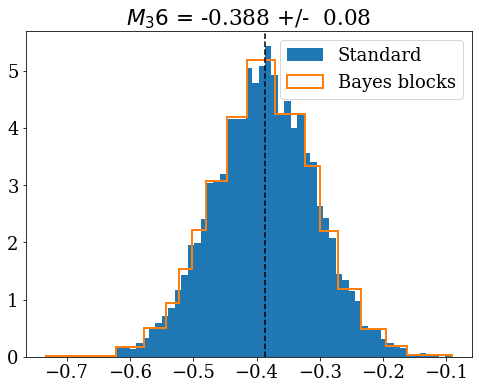

1/variance =  156.19020728126415
[-0.73254912 -0.62127051 -0.57794205 -0.54299595 -0.52165179 -0.50176437
 -0.47934066 -0.44694529 -0.41473255 -0.37116678 -0.3233852  -0.30023813
 -0.2713239  -0.23447217 -0.19593707 -0.16251976 -0.09148114]


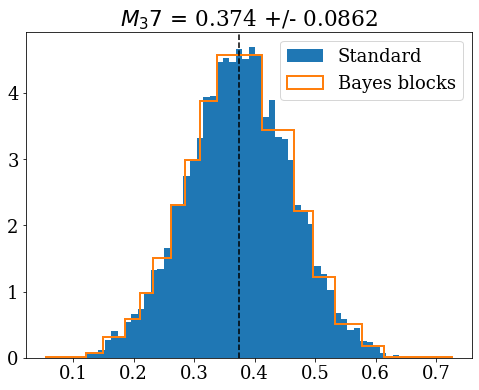

1/variance =  134.72729168893943
[0.05493272 0.12139458 0.14886001 0.18517559 0.21073412 0.23183149
 0.26158485 0.28416915 0.30982114 0.33755734 0.41208361 0.4653497
 0.49702709 0.5328089  0.5775098  0.61360001 0.72562246]


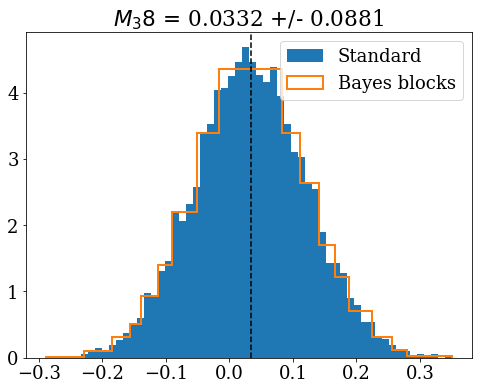

1/variance =  128.84189394311167
[-0.28891454 -0.22937679 -0.18452229 -0.15715859 -0.13882537 -0.11194726
 -0.09101241 -0.05182256 -0.01668603  0.08218883  0.11089752  0.14093573
  0.16586433  0.18801173  0.22420459  0.2558518   0.27948963  0.35010222]


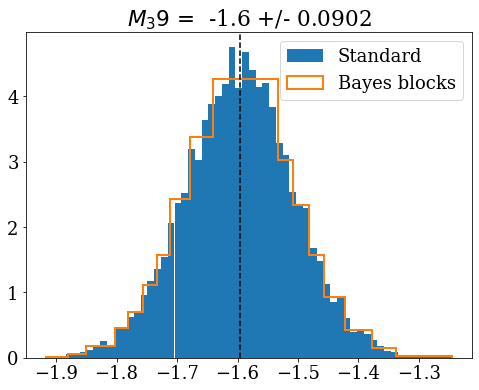

1/variance =  122.8486559246932
[-1.91681437 -1.88063013 -1.85050361 -1.80300072 -1.78142822 -1.75630185
 -1.73360756 -1.71136894 -1.67879749 -1.64112598 -1.53298682 -1.50878705
 -1.48134879 -1.45698602 -1.42147831 -1.37688697 -1.33872267 -1.24565401]


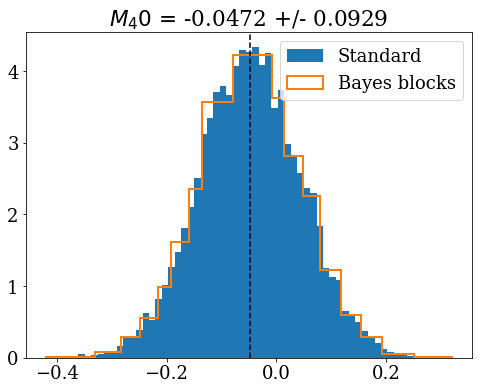

1/variance =  115.9825503662664
[-0.41979031 -0.32960313 -0.28274995 -0.24898014 -0.21537671 -0.19111582
 -0.15970009 -0.1356432  -0.07948494 -0.00695019  0.01367502  0.04885835
  0.08084766  0.11733696  0.15382354  0.19231791  0.25163983  0.32034103]


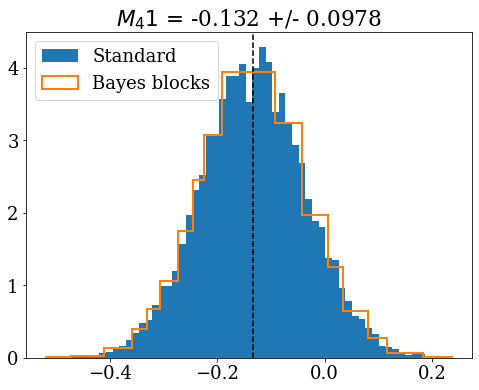

1/variance =  104.51066993758823
[-0.51896996 -0.47301316 -0.41082965 -0.35966624 -0.33019739 -0.30574761
 -0.2722586  -0.24440707 -0.22529517 -0.19152225 -0.09232387 -0.04218892
  0.00545529  0.03343181  0.08008578  0.1166775   0.18300683  0.23689679]


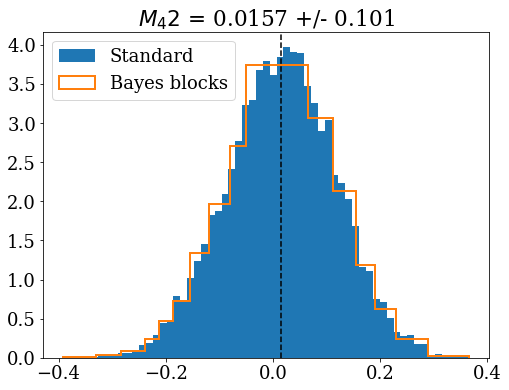

1/variance =  97.1022358787597
[-0.39102432 -0.32979331 -0.28279924 -0.23953781 -0.21197713 -0.18663614
 -0.15540333 -0.11915732 -0.08065738 -0.05096163  0.06594205  0.11173525
  0.15390444  0.18943223  0.22858416  0.28834528  0.36594783]


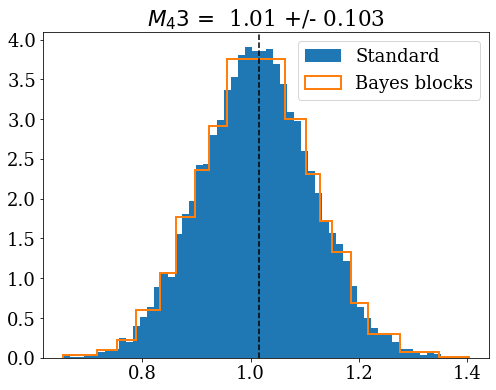

1/variance =  93.74293746880936
[0.6544494  0.71683418 0.75420149 0.78847351 0.83187738 0.86188764
 0.89724613 0.92239362 0.95586675 1.06389719 1.10159597 1.12768849
 1.15046937 1.18569792 1.21737707 1.27482696 1.34850295 1.40341066]


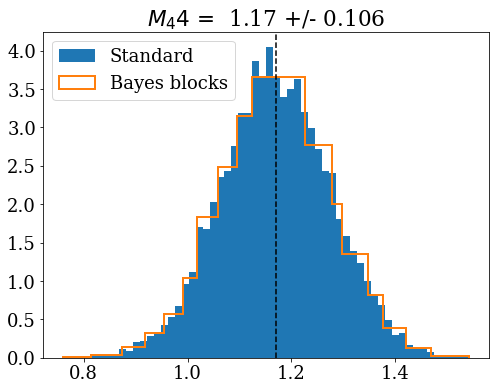

1/variance =  88.78180279684403
[0.76073837 0.81398192 0.87277576 0.91797099 0.95398719 0.99094046
 1.01814085 1.05929794 1.09432341 1.12320532 1.22560007 1.27847166
 1.29759284 1.34795708 1.37587156 1.4215856  1.4697048  1.54245303]


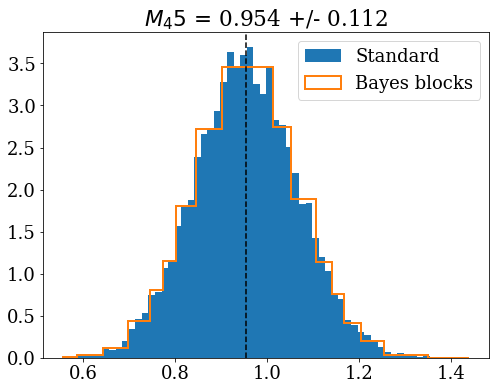

1/variance =  79.42592388295996
[0.55720481 0.58745459 0.64423694 0.69703693 0.74569561 0.77271238
 0.801984   0.84564644 0.90097128 1.01369127 1.05164104 1.10518693
 1.14024079 1.16728688 1.20424342 1.25356645 1.35029213 1.43880917]


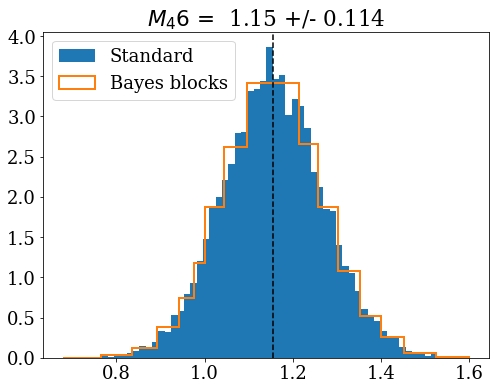

1/variance =  76.95769044452368
[0.67968465 0.76471031 0.83566502 0.89158966 0.94116335 0.97505483
 1.00148749 1.04450542 1.09655742 1.21482418 1.2559031  1.30325946
 1.35312263 1.39882729 1.45112297 1.5254978  1.59966228]


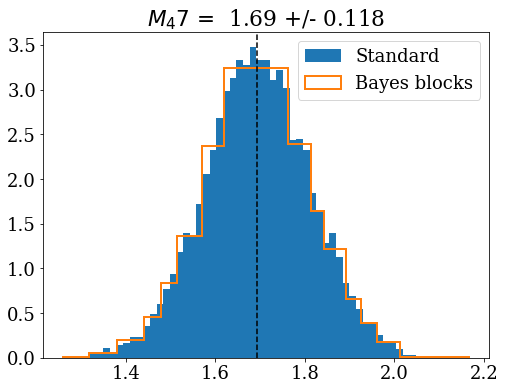

1/variance =  71.52908793239999
[1.26060782 1.31699977 1.38132466 1.44096719 1.47914108 1.51354995
 1.56934618 1.61917468 1.76315924 1.81477199 1.84240657 1.8919449
 1.92493407 1.96085397 2.01351747 2.166941  ]


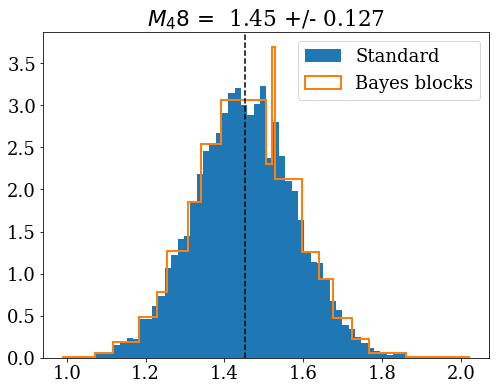

1/variance =  61.670090267929645
[0.9910507  1.07222899 1.11755873 1.18395724 1.22823689 1.25345211
 1.30709763 1.3400085  1.39034382 1.50625997 1.52169573 1.5286324
 1.59581729 1.63889173 1.6742339  1.72472153 1.76564756 1.8611931
 2.0211151 ]
Deleting one bin: width = 0.0001447671432840414


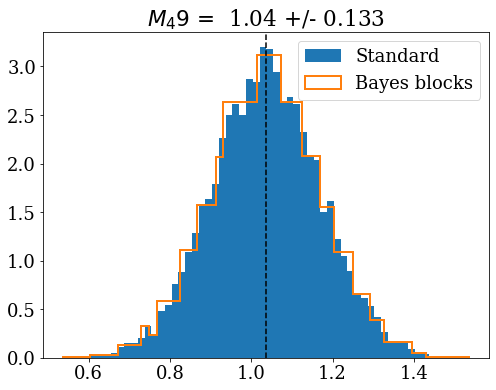

1/variance =  56.3572866152
[0.53775824 0.60419185 0.67100376 0.72903542 0.7481893  0.76848559
 0.82530557 0.86703523 0.91370486 0.93039256 1.01465369 1.07299304
 1.12402455 1.16975621 1.20391905 1.24916203 1.29290539 1.32642971
 1.39597583 1.42945597 1.53614622]
Deleting one bin: width = 7.774118932701857e-05
Deleting one bin: width = 4.602207083498344e-05


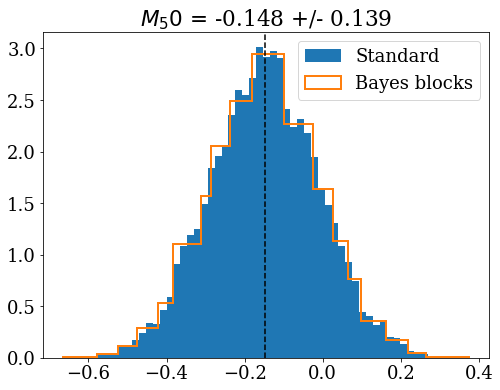

1/variance =  51.809207982524306
[-0.66392382 -0.57789933 -0.52377937 -0.47540931 -0.42057693 -0.38243107
 -0.31050297 -0.28499815 -0.23679477 -0.18243426 -0.09907071 -0.02397668
  0.02535078  0.06516291  0.09709882  0.16249688  0.21690357  0.26375214
  0.37457865]
Deleting one bin: width = 0.00048325995124953725


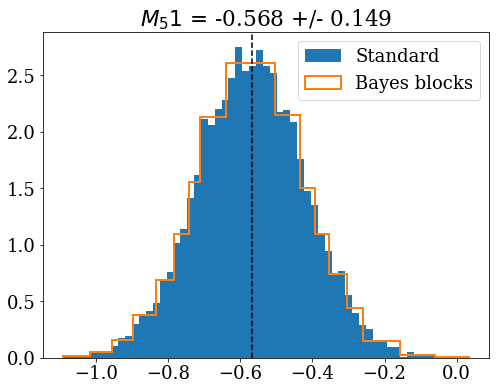

1/variance =  45.24441884619386
[-1.08976108 -1.01634571 -0.95482027 -0.89556131 -0.83439862 -0.7835272
 -0.74159486 -0.71003354 -0.63797362 -0.50373806 -0.43419716 -0.39158253
 -0.35253208 -0.30502449 -0.25906997 -0.15789136 -0.06011917  0.03455878]


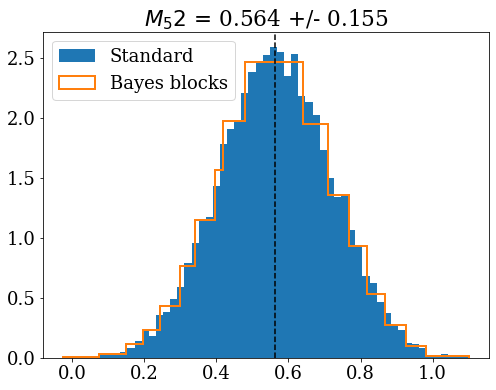

1/variance =  41.74869337538533
[-0.02416071  0.07449859  0.15079314  0.1960793   0.242479    0.29980447
  0.34056651  0.39656316  0.41878316  0.48049978  0.64039955  0.70950836
  0.76874692  0.81766189  0.86906788  0.9252494   0.98207992  1.1013982 ]


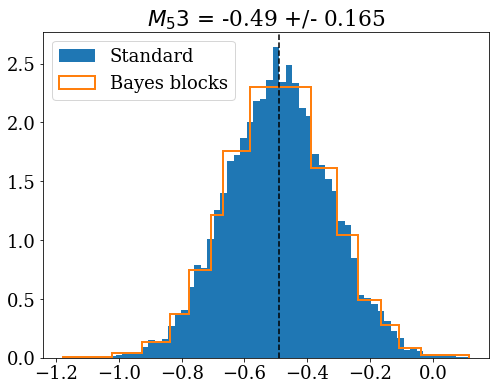

1/variance =  36.76403693864981
[-1.17652875 -1.02154743 -0.92613168 -0.83799669 -0.77742378 -0.70657133
 -0.66776033 -0.58215208 -0.38806957 -0.30513426 -0.23952113 -0.16667927
 -0.10711516 -0.03710858  0.11534316]


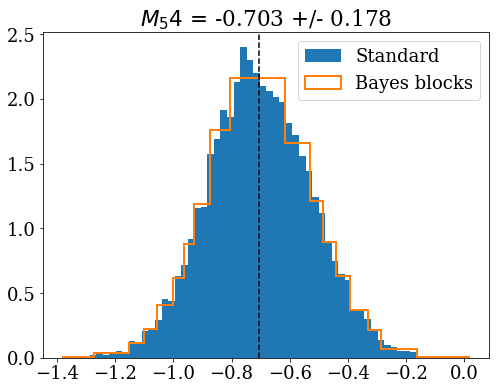

1/variance =  31.633160933337766
[-1.37837917 -1.27329742 -1.15336427 -1.10035045 -1.05559799 -1.00034608
 -0.96215187 -0.92903119 -0.87398319 -0.80584426 -0.61586057 -0.52997284
 -0.48422016 -0.44125968 -0.39267259 -0.3320579  -0.28665799 -0.162478
  0.01762755]


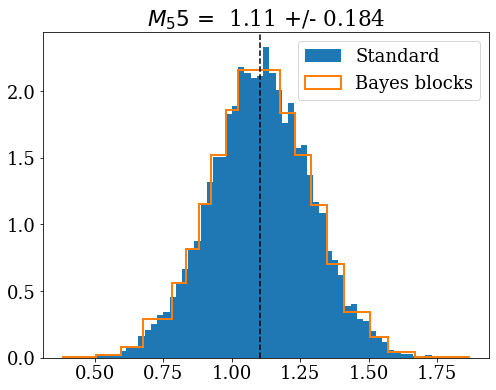

1/variance =  29.675998890522404
[0.38528904 0.50593593 0.59411374 0.67515331 0.78365793 0.83431927
 0.88163835 0.9240938  0.97891242 1.0246919  1.17827263 1.23234886
 1.28839322 1.34693308 1.40933408 1.50464355 1.57017119 1.66784108
 1.86737547]


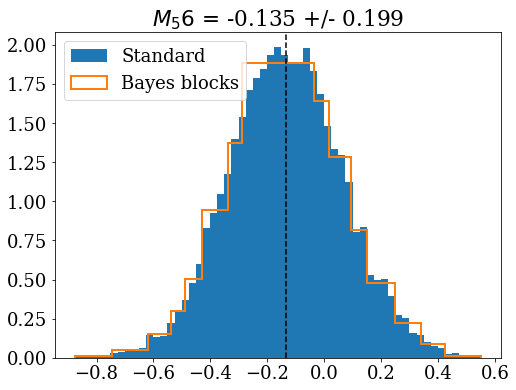

1/variance =  25.196280848145722
[-0.87602819 -0.74494592 -0.61875172 -0.53700262 -0.48767551 -0.42907296
 -0.33752551 -0.28925567 -0.03518223  0.01488846  0.09230598  0.15002311
  0.24953971  0.33830728  0.42413342  0.54897673]


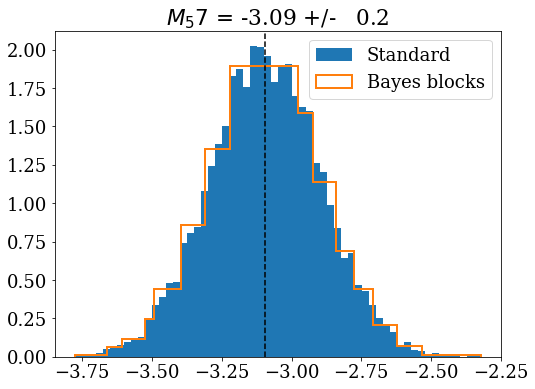

1/variance =  25.001129151839272
[-3.77664242 -3.6630589  -3.608616   -3.52566903 -3.49131126 -3.39472751
 -3.30977208 -3.221713   -2.97695695 -2.92304004 -2.84152901 -2.7759673
 -2.70951101 -2.62027598 -2.53409027 -2.32209469]


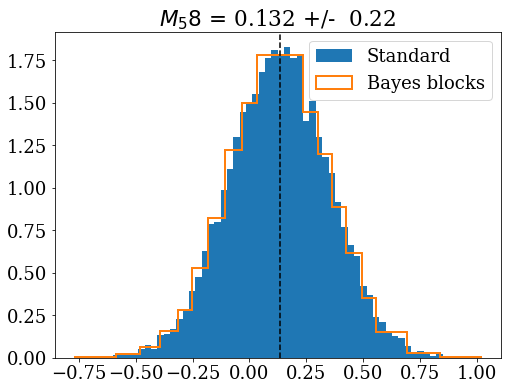

1/variance =  20.64739088098132
[-0.76744987 -0.58652062 -0.48293045 -0.39525579 -0.31568499 -0.2514828
 -0.18356242 -0.10535405 -0.03098606  0.03275634  0.2336489   0.30246432
  0.36388052  0.42522471  0.49562742  0.55619118  0.69160593  0.84018578
  1.01704879]


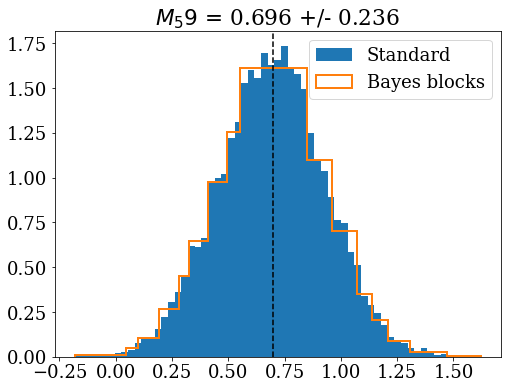

1/variance =  17.953047829550997
[-0.18168013  0.04692937  0.09962247  0.19290984  0.28140333  0.32651003
  0.40994338  0.492193    0.55147724  0.8489983   0.96244009  1.07124828
  1.13943702  1.21046839  1.30882596  1.47128126  1.62077035]


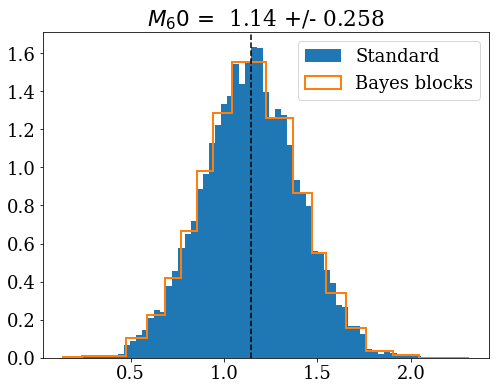

1/variance =  14.987349175703729
[0.13902519 0.23755176 0.47202628 0.58465586 0.68484188 0.76818318
 0.85620481 0.941815   1.03972872 1.22473244 1.36853423 1.47129521
 1.5485071  1.6514576  1.7605542  1.90589943 2.04560263 2.31291052]
Deleting one bin: width = 0.001975826873509945


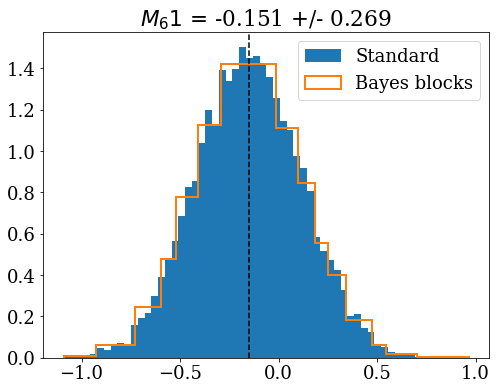

1/variance =  13.806245367504408
[-1.09066803 -0.92475781 -0.72699219 -0.5977117  -0.51969339 -0.40911352
 -0.29005859 -0.01075248  0.09760888  0.18428514  0.25174562  0.3419429
  0.47423518  0.54627617  0.70433505  0.9675451 ]
Deleting one bin: width = 0.001178245067145034
Deleting one bin: width = 1.8024643499980897e-06


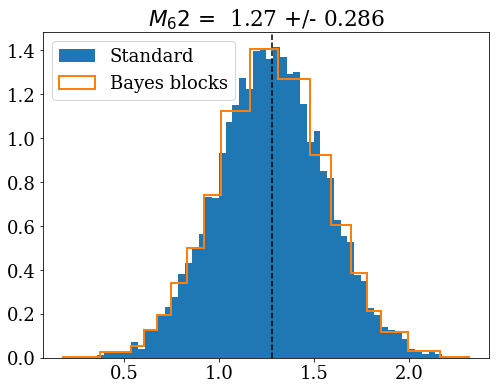

1/variance =  12.265210829382696
[0.1787697  0.37273577 0.53670149 0.60399292 0.67148787 0.74411063
 0.82901134 0.91934145 1.00990906 1.1620086  1.30808221 1.47685878
 1.5885275  1.69299474 1.7797245  1.85061872 1.99585843 2.1621162
 2.31653544]


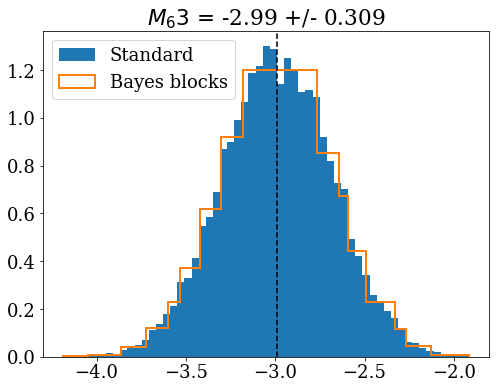

1/variance =  10.474905482956865
[-4.18578499 -4.04862359 -3.86271311 -3.72559565 -3.60111326 -3.53087764
 -3.4233642  -3.30589487 -3.18216926 -2.76748178 -2.64571131 -2.59260224
 -2.49033088 -2.32938946 -2.27057324 -2.12614718 -1.91490108]


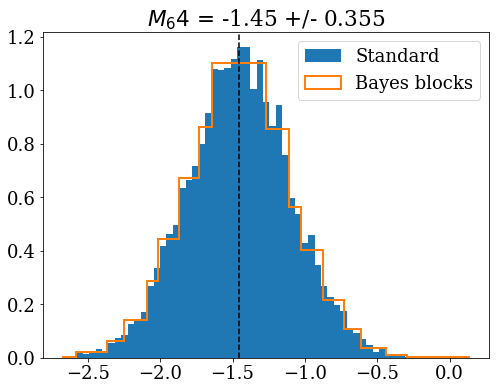

1/variance =  7.942522784512272
[-2.66970517 -2.5826185  -2.36853045 -2.24757648 -2.09018311 -2.01258713
 -1.87268611 -1.73016538 -1.64142537 -1.27051642 -1.10774231 -1.02615611
 -0.87235763 -0.73057007 -0.61089645 -0.4426161  -0.2965936   0.13498083]


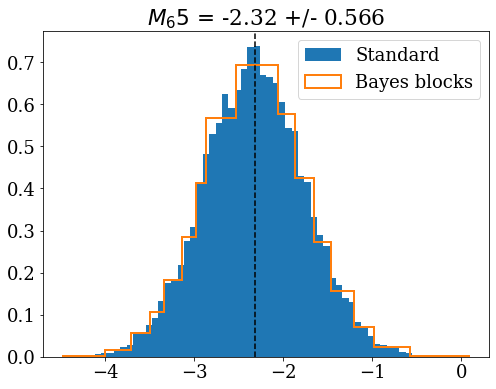

1/variance =  3.1182776706011497
[-4.47331653 -4.01033863 -3.70753747 -3.49650766 -3.33998756 -3.14000339
 -2.98371806 -2.87379759 -2.52809546 -2.06028459 -1.87009304 -1.65930131
 -1.4659712  -1.20375393 -0.98574145 -0.58006879  0.08845908]


In [48]:
for mi in range(n_params):
    y = mil_vec_array[:,mi]
    blocks = bayesian_blocks_mod(y)
    plt.figure(figsize=(8,6))
    plt.hist(y,bins=optimal_n_bins(y),density=True,label='Standard')
    plt.hist(y, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks')
    plt.title(fr'$M_{mi}$ = {np.mean(y):5.3} +/- {np.std(y):5.3}')
    plt.axvline(usdbmil[mi],c='k',ls='--')
    plt.legend()
    plt.show()
    print('1/variance = ',(1/np.std(y))**2)
    print(blocks)

### USDB parameter sample distributions

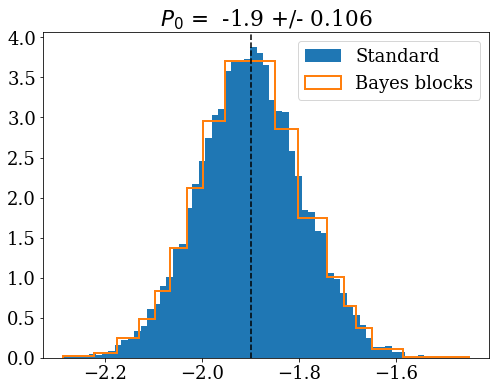

Deleting one bin: width = 0.00023751377114522576


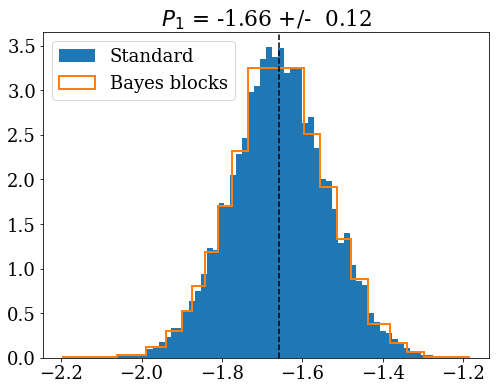

Deleting one bin: width = 0.00026543925388200496


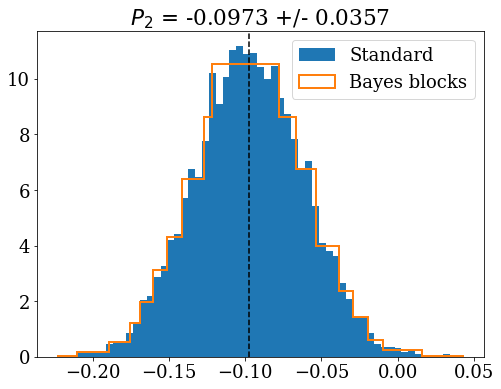

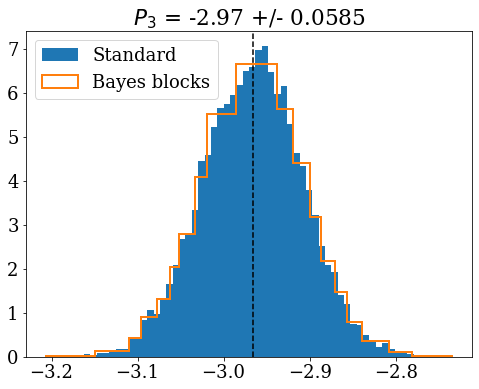

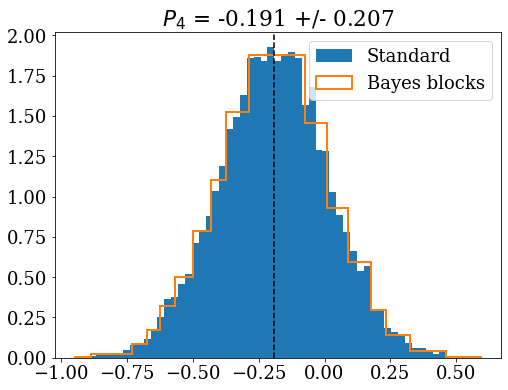

Deleting one bin: width = 0.0006820153950084507


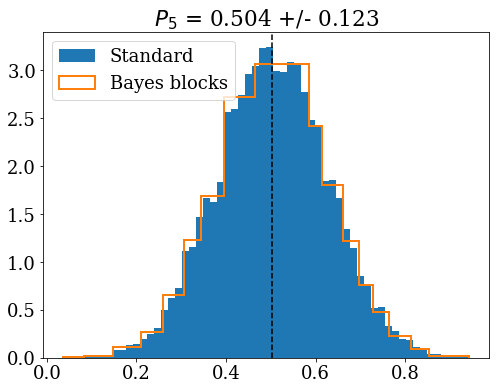

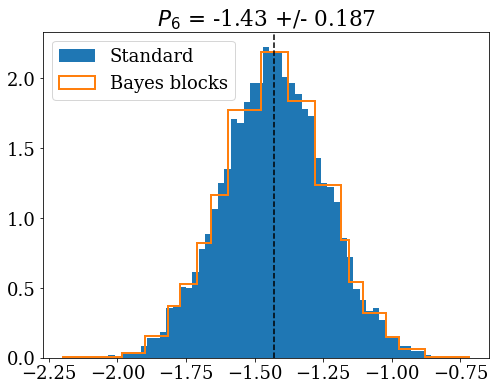

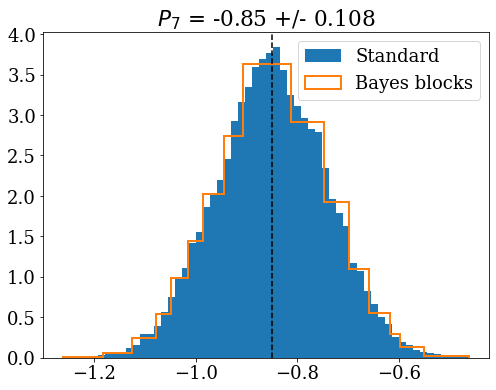

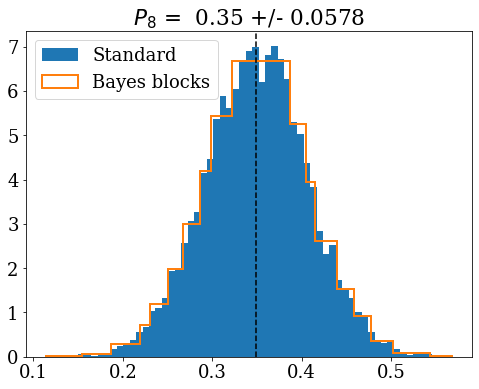

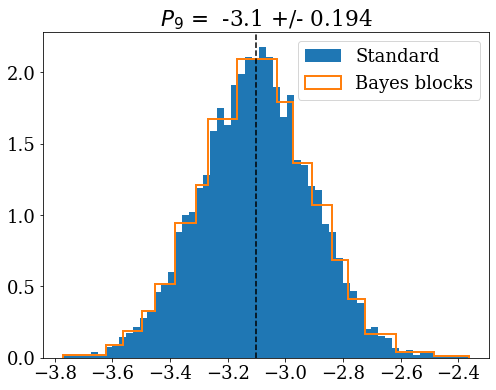

Deleting one bin: width = 0.0005070613595785645


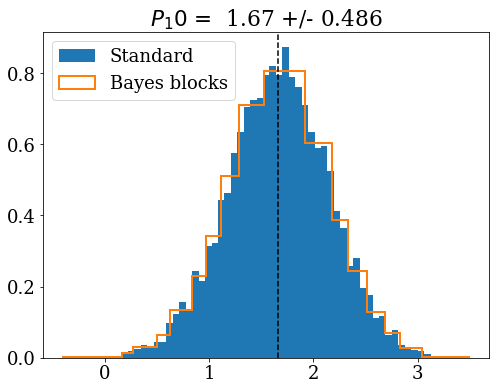

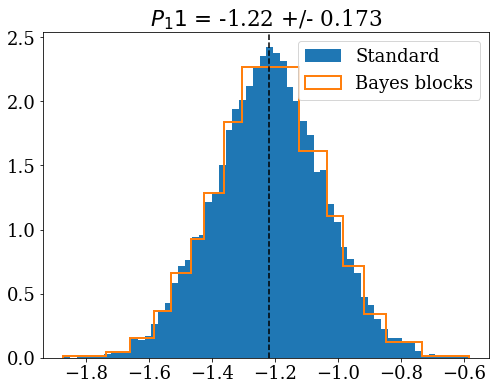

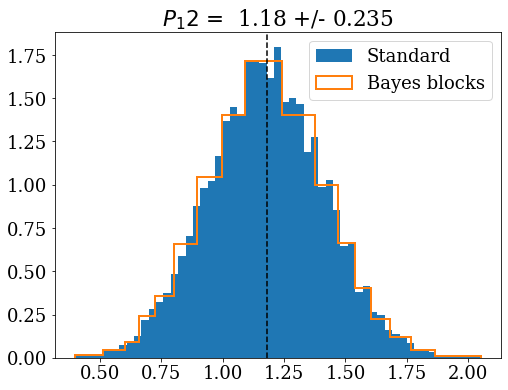

Deleting one bin: width = 0.00025227401909400093


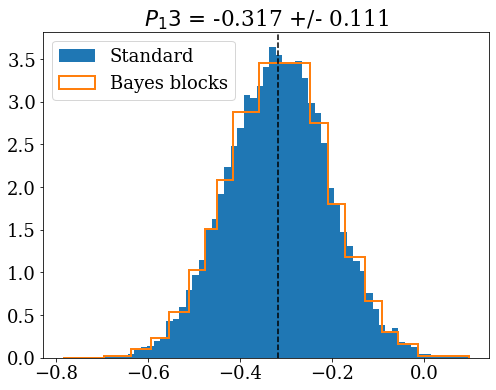

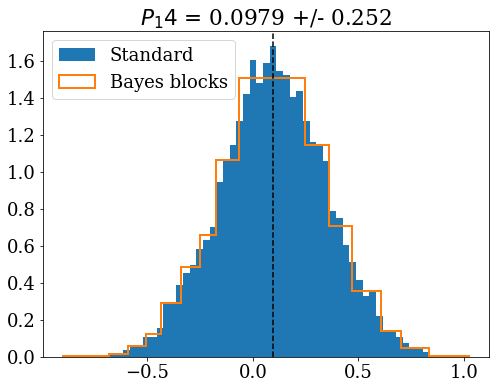

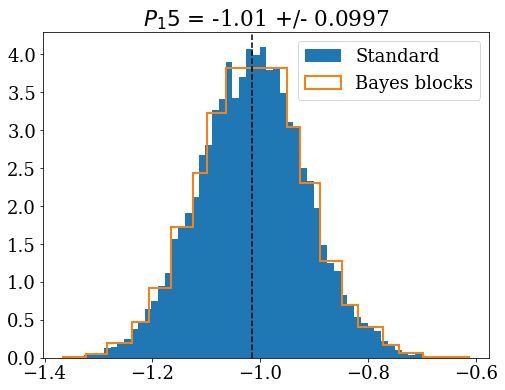

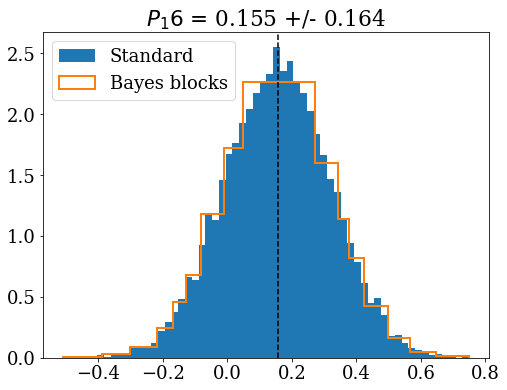

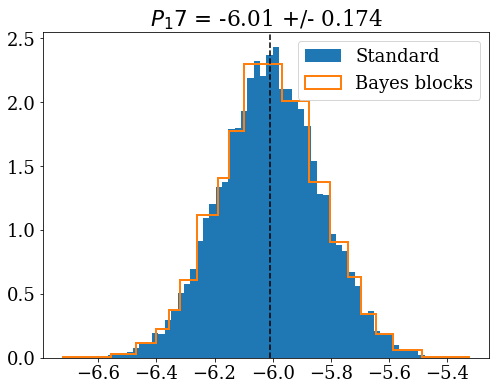

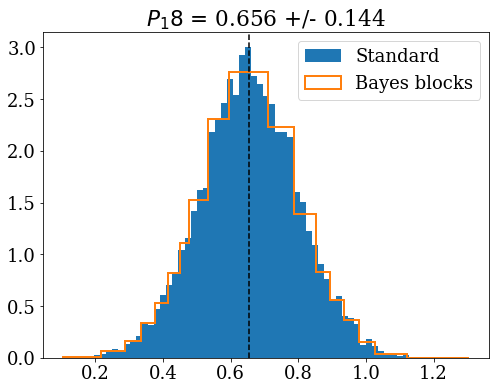

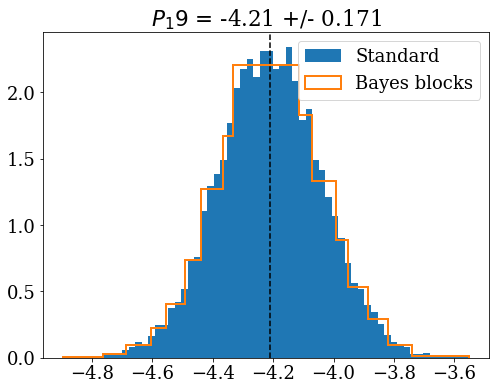

Deleting one bin: width = 3.0074050736517144e-05


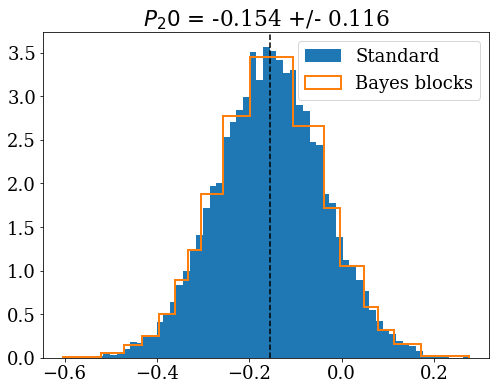

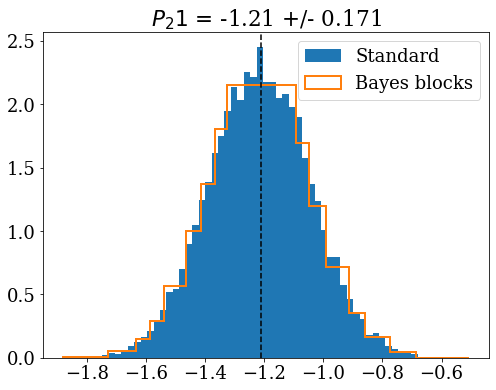

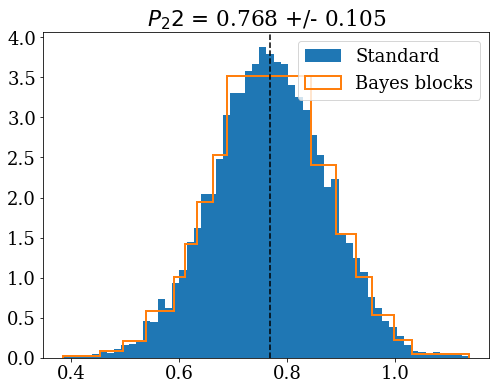

Deleting one bin: width = 0.00023784619884459346
Deleting one bin: width = 0.0001600241326054075


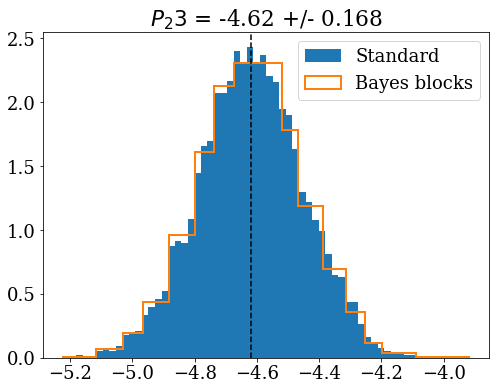

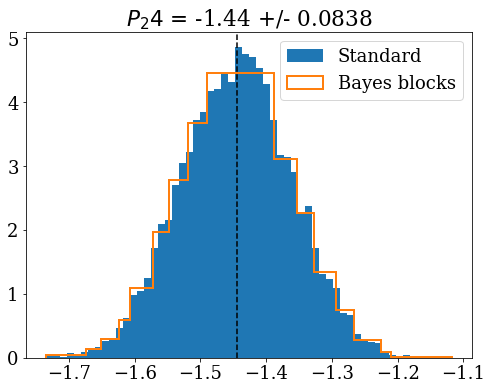

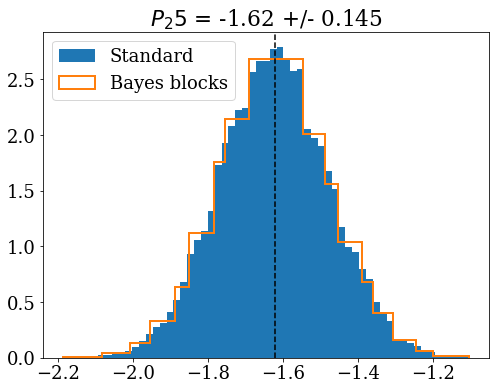

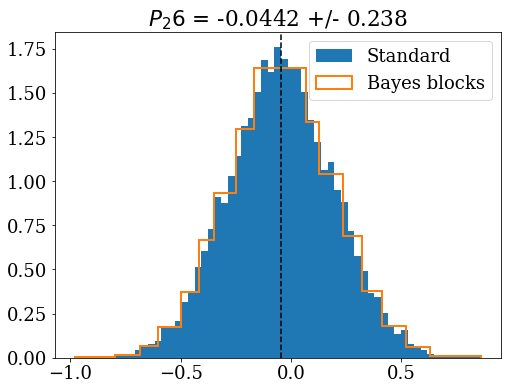

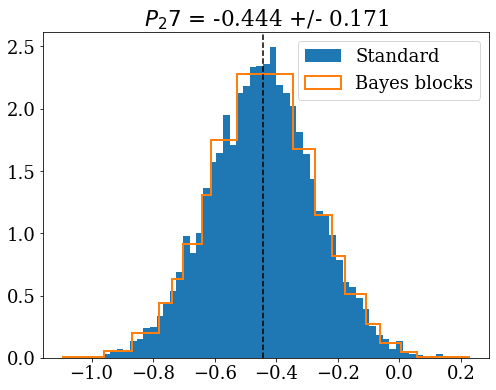

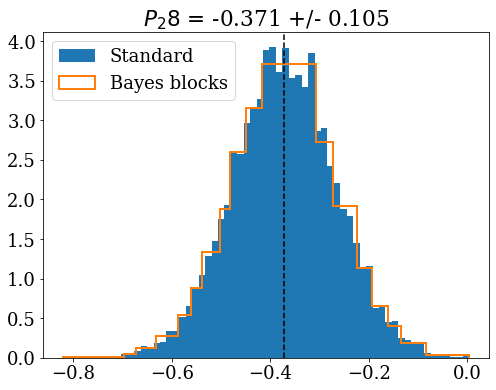

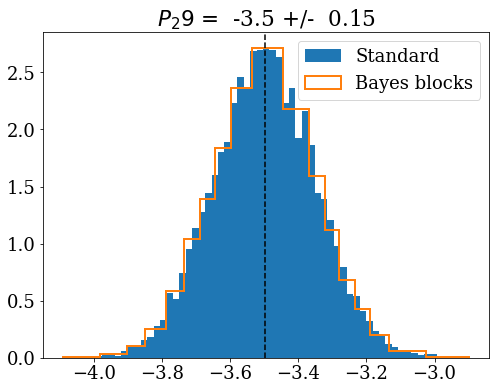

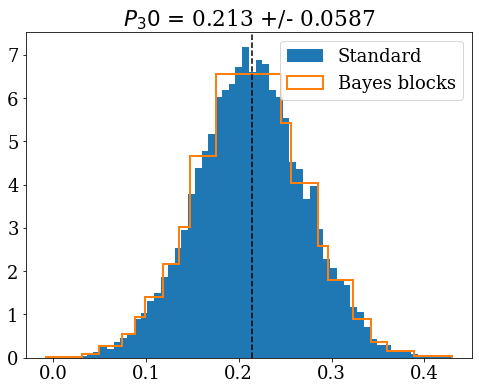

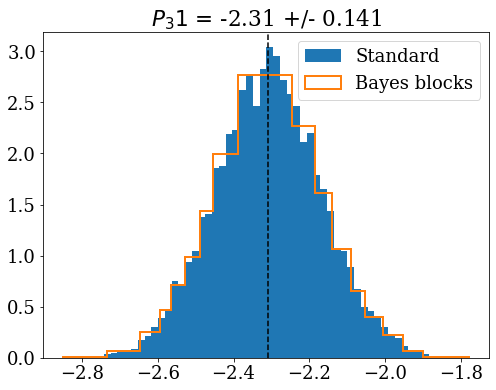

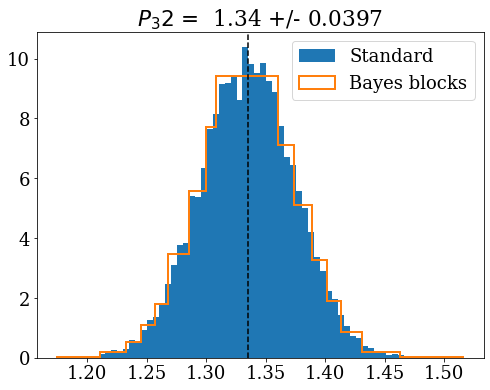

Deleting one bin: width = 0.00023999261668650185


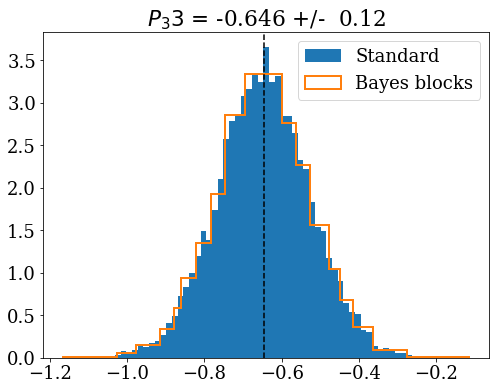

Deleting one bin: width = 1.0077061800506382e-05


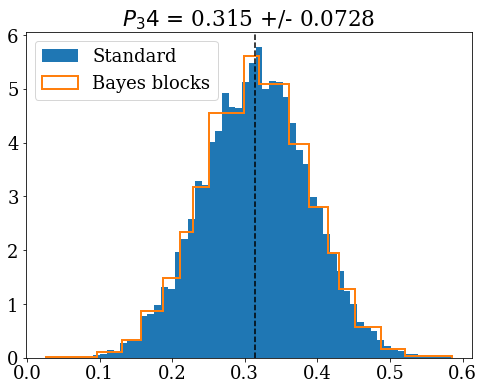

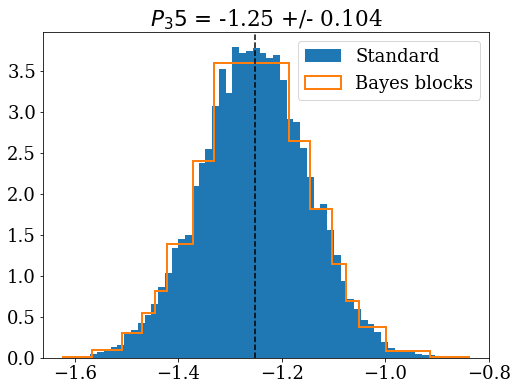

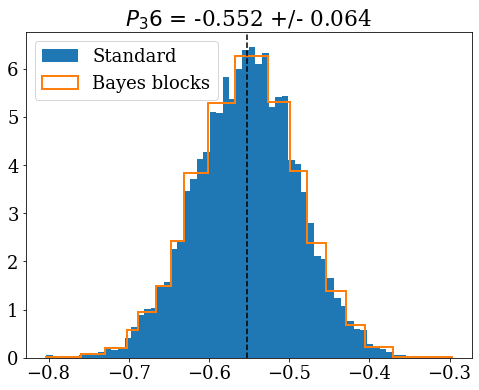

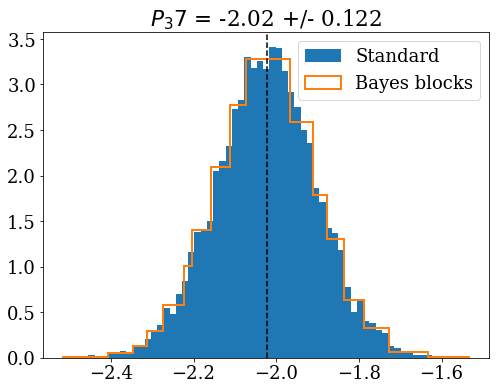

Deleting one bin: width = 5.068923023987537e-05


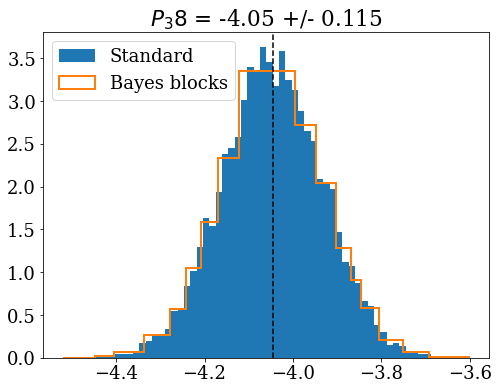

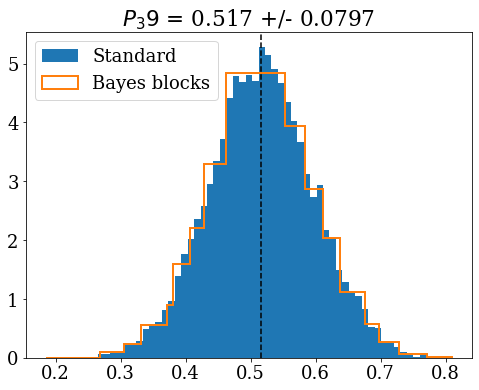

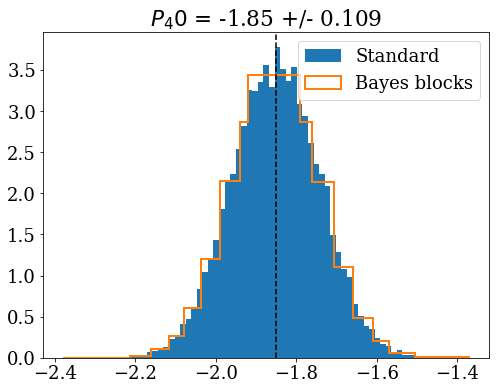

Deleting one bin: width = 4.446942205049709e-05


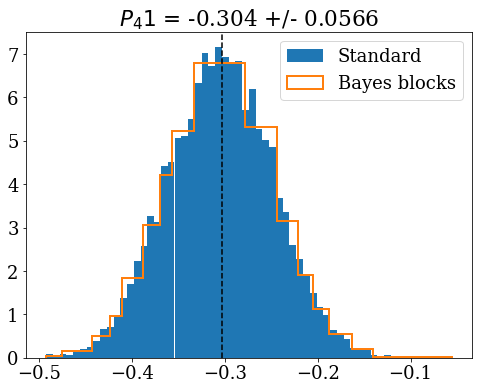

Deleting one bin: width = 0.00015566322327600912


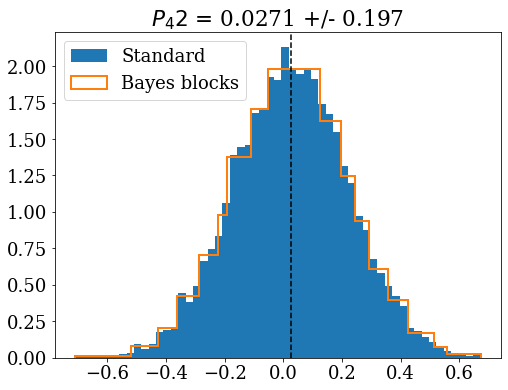

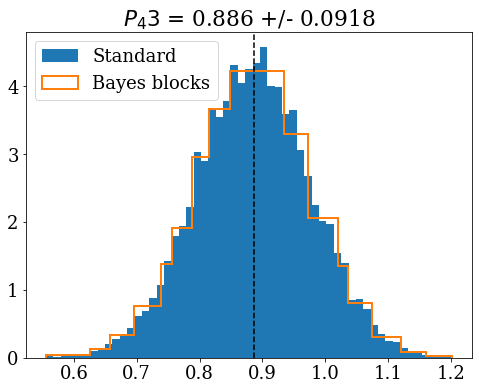

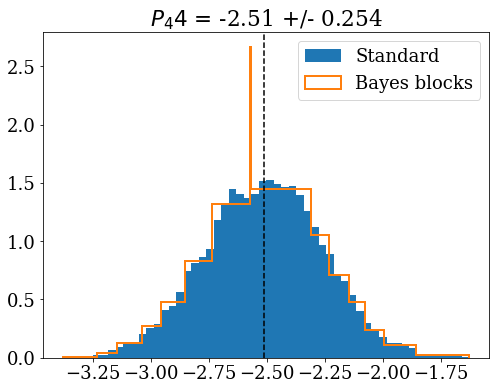

Deleting one bin: width = 6.012069054817104e-06


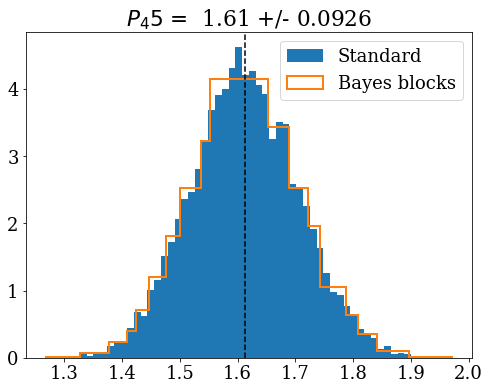

Deleting one bin: width = 0.0003256149799200081


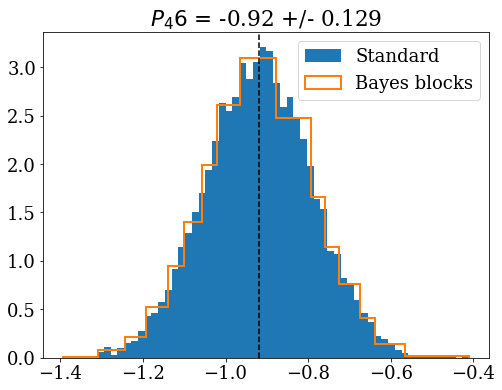

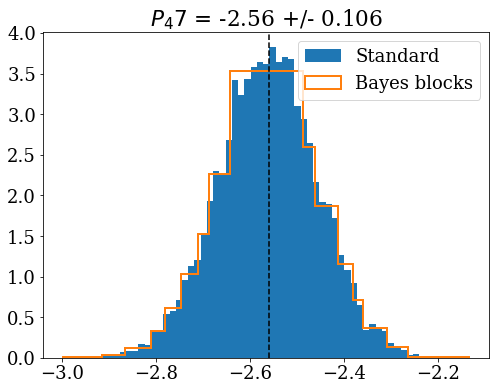

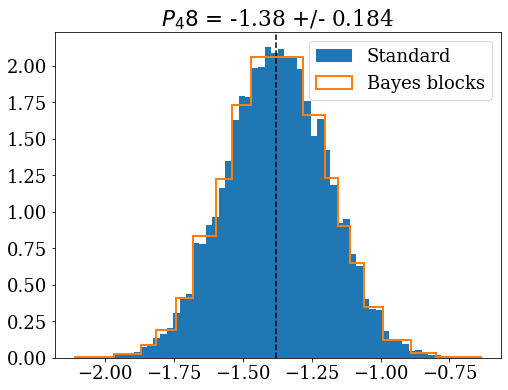

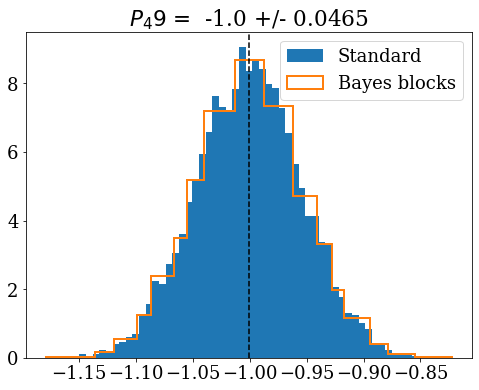

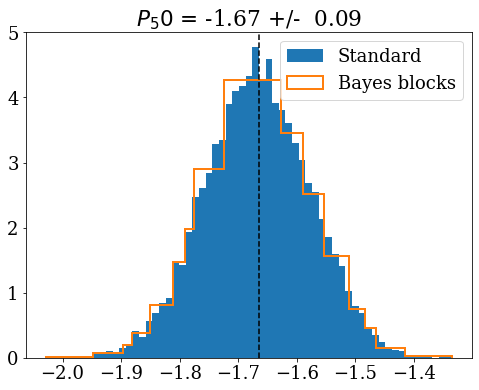

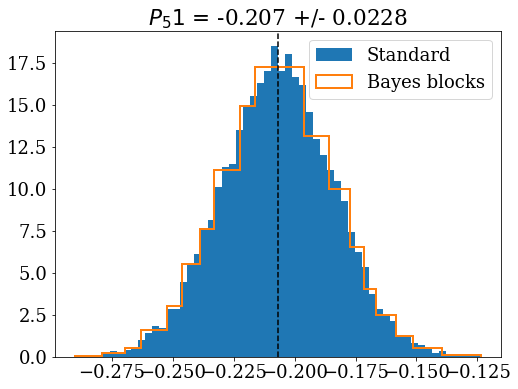

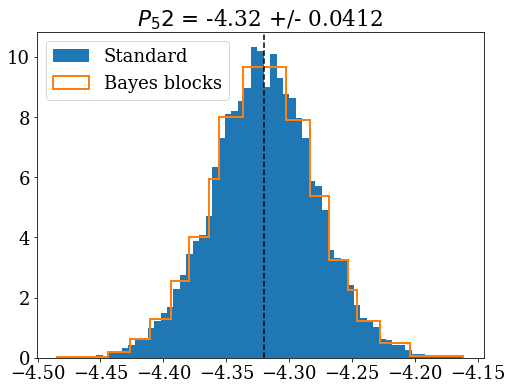

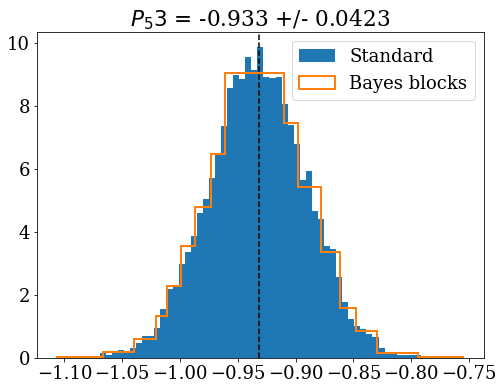

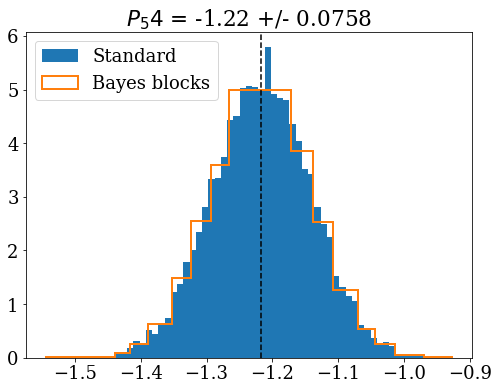

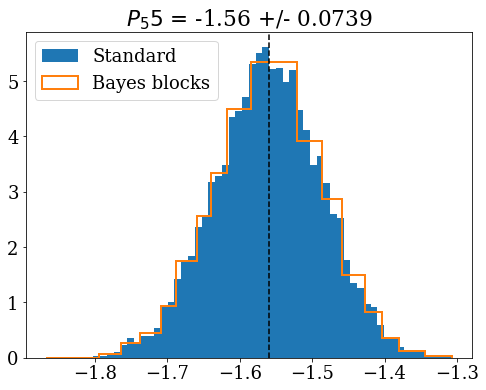

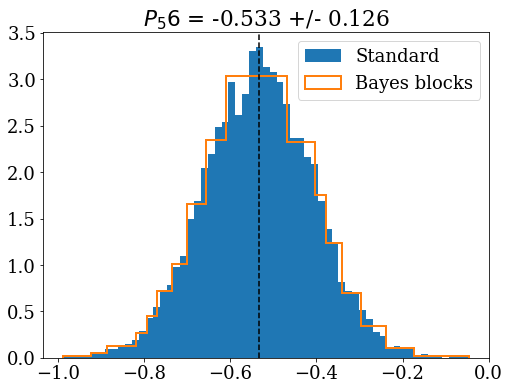

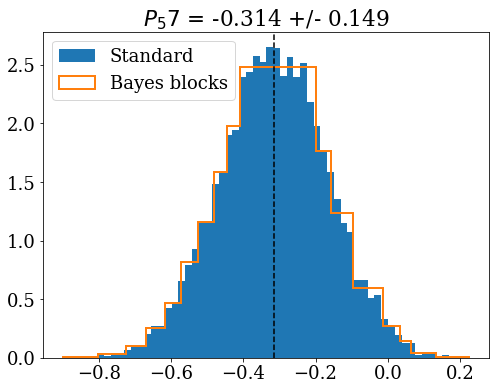

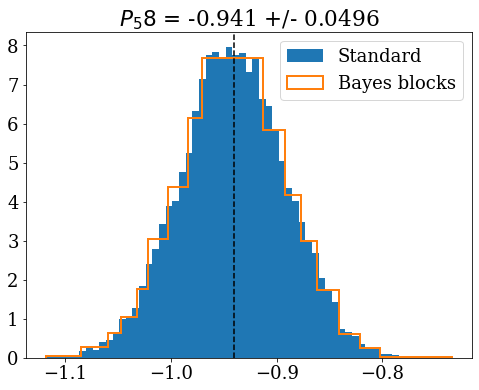

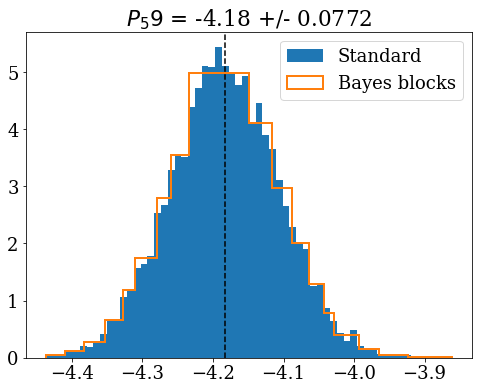

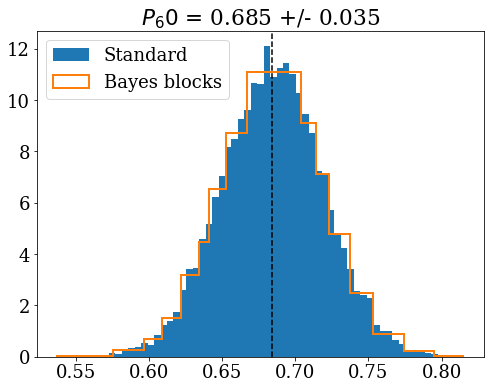

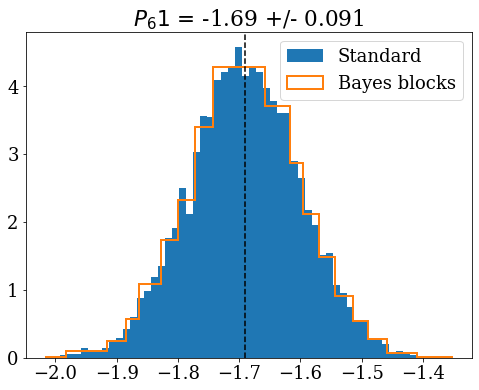

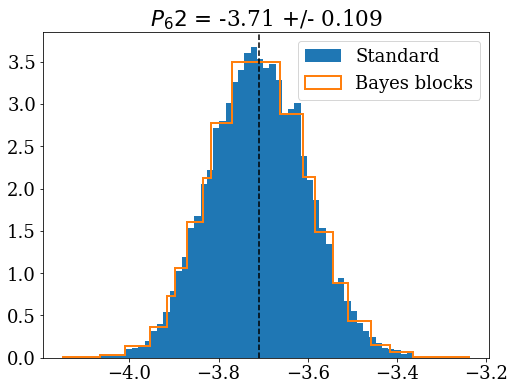

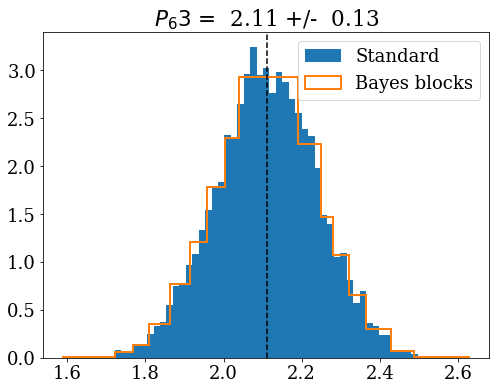

Deleting one bin: width = 0.00012136341417035013


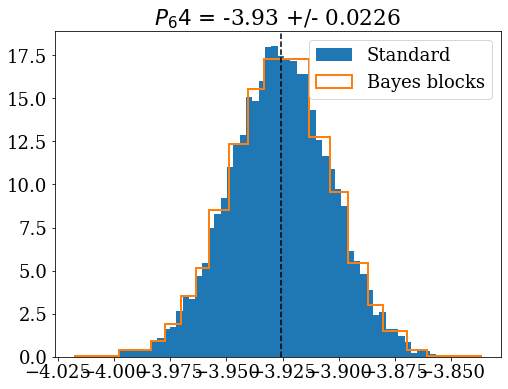

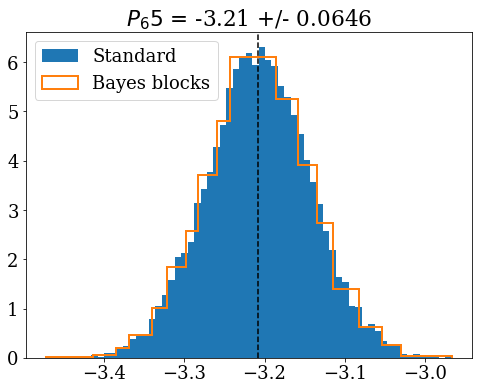

In [51]:
for pi in range(n_params):
    y = int_vec_array[:,pi]
    blocks = bayesian_blocks_mod(y)
    plt.figure(figsize=(8,6))
    plt.hist(y,bins=optimal_n_bins(y),density=True,label='Standard')
    plt.hist(y, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks')
    plt.title(fr'$P_{pi}$ = {np.mean(y):5.3} +/- {np.std(y):5.3}')
    plt.axvline(usdb[pi],c='k',ls='--')
    plt.legend()
    plt.show()

### Shell-model B(GT) distributions 
These are with $g_A = Q = 1$, so just getting an idea of the spreads and distributions.

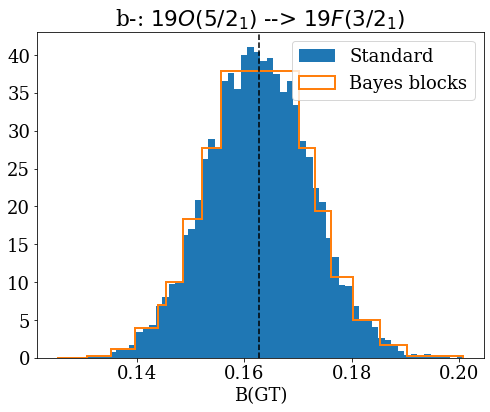

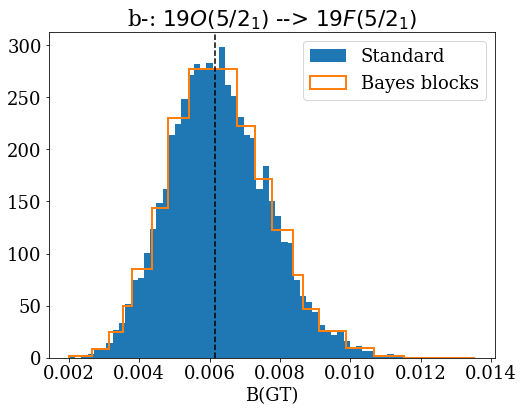

Deleting one bin: width = 0.00035050000000003134
Deleting one bin: width = 2.999999999997449e-05


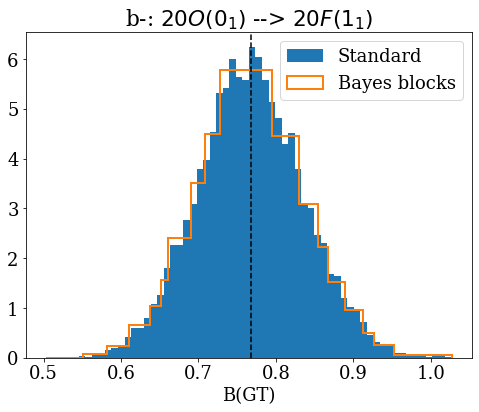

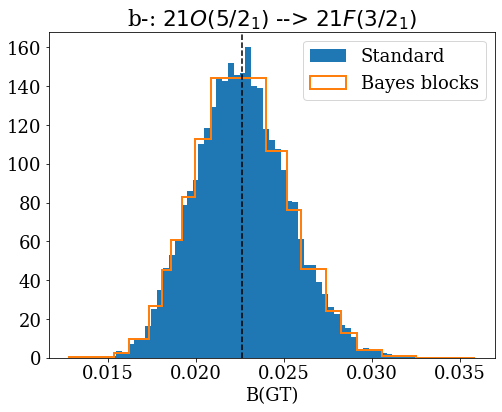

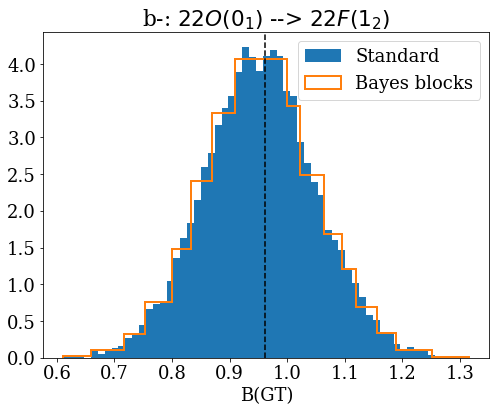

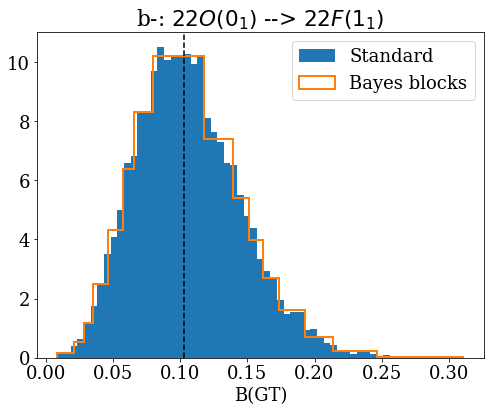

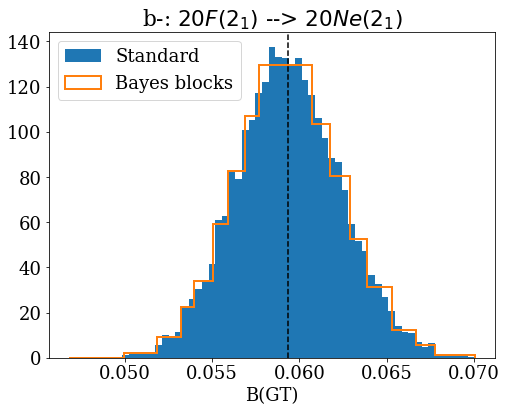

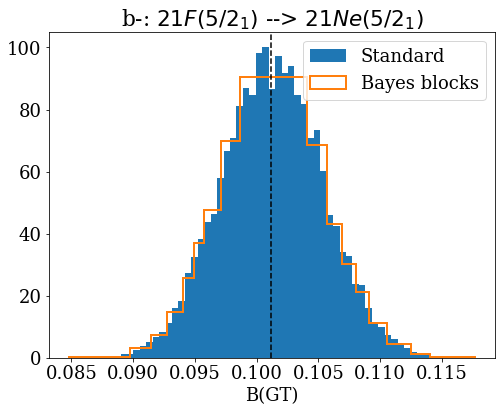

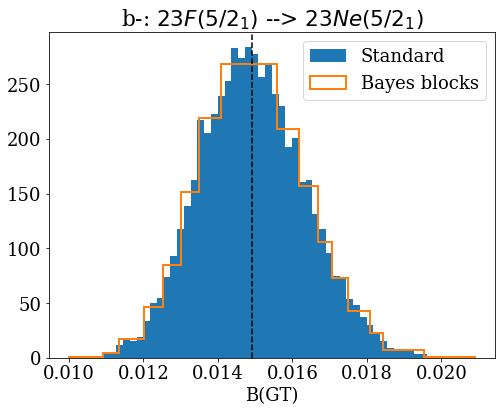

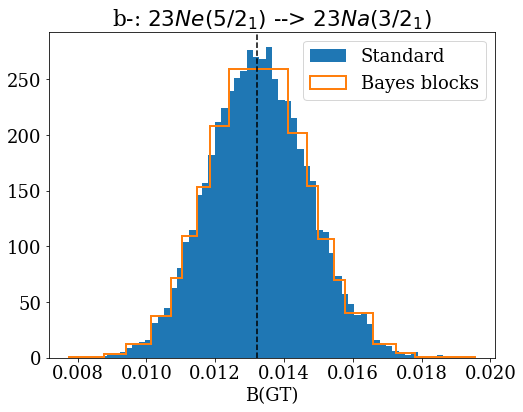

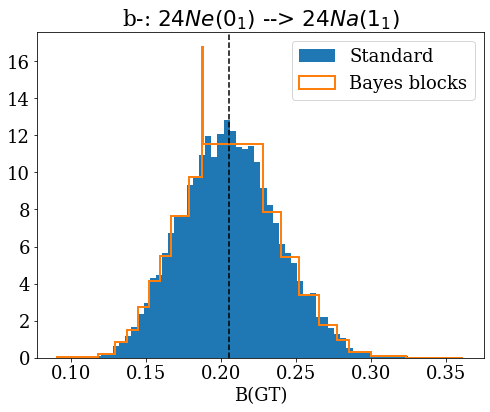

Deleting one bin: width = 1.4500000000000624e-05


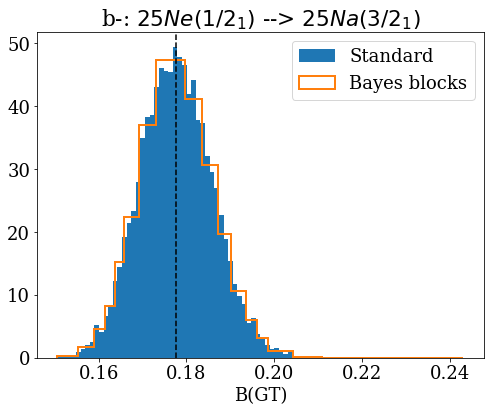

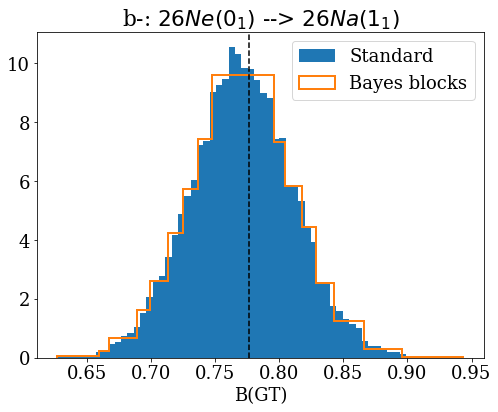

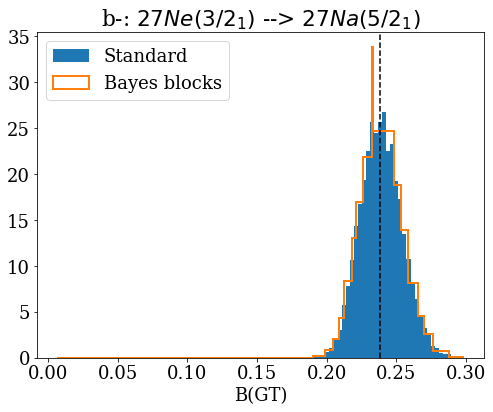

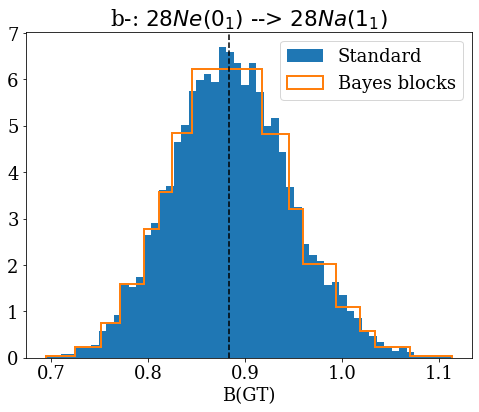

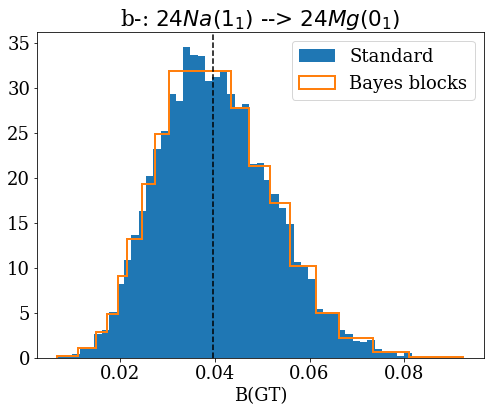

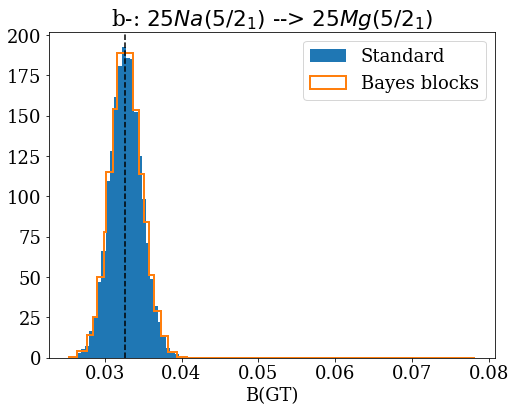

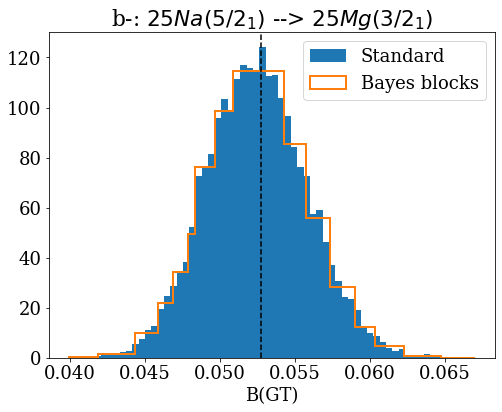

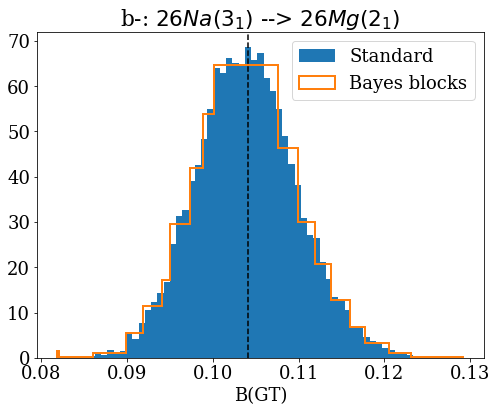

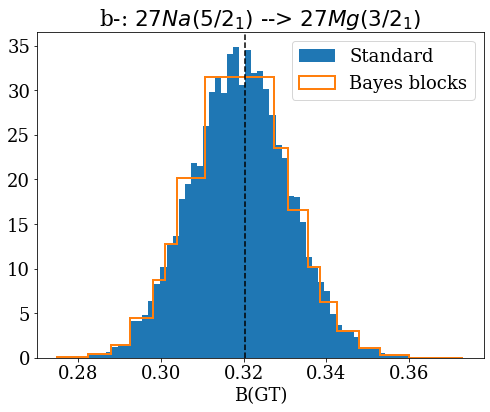

Deleting one bin: width = 2.599999999997049e-05


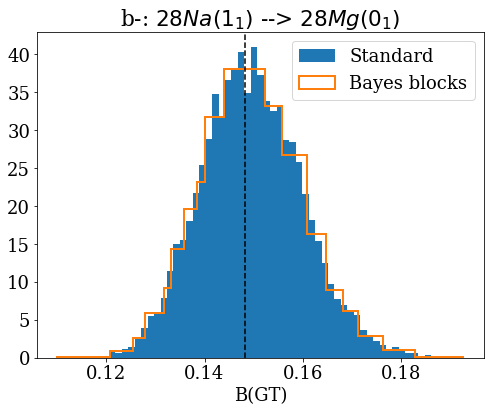

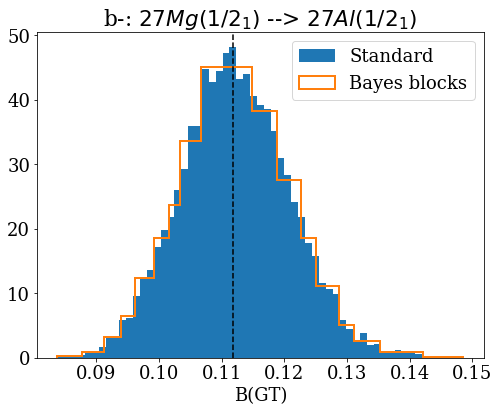

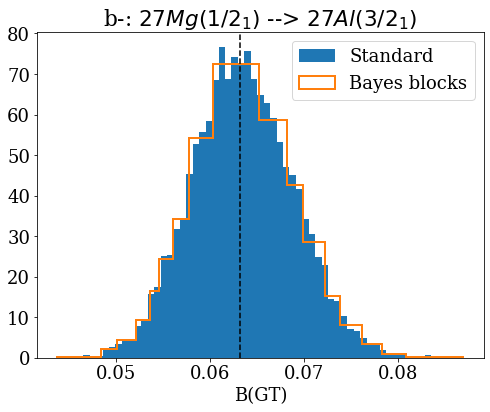

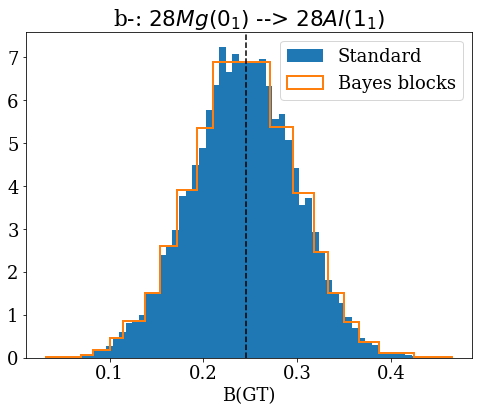

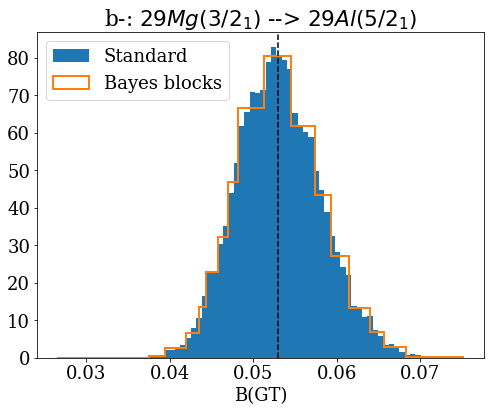

Deleting one bin: width = 1.2e-05
Deleting one bin: width = 0.00028099999999999653
Deleting one bin: width = 7.100000000000162e-05
Deleting one bin: width = 1.8999999999991246e-05


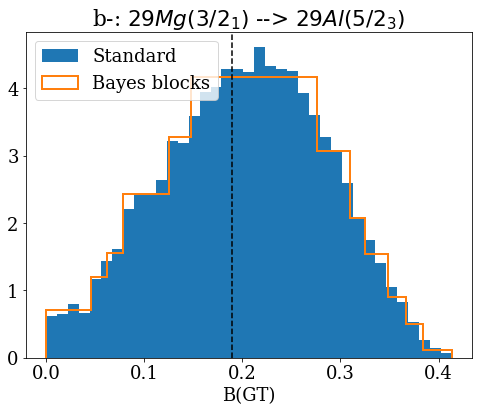

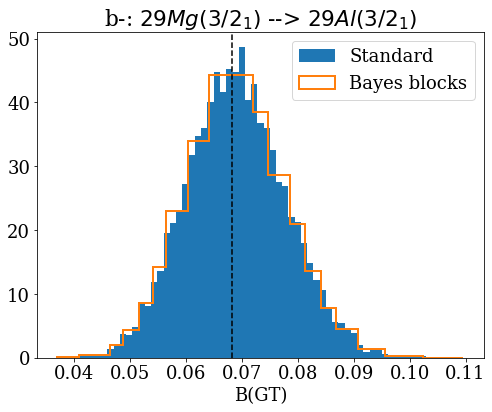

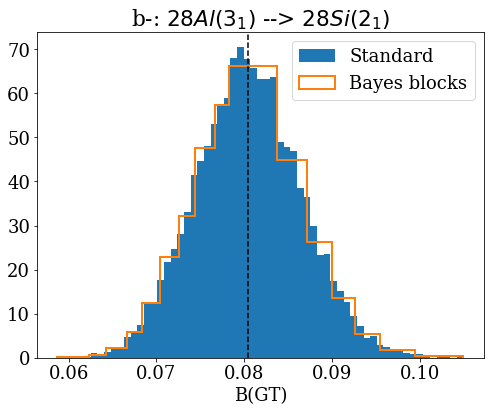

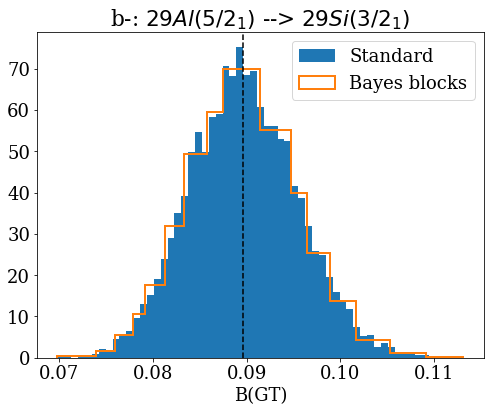

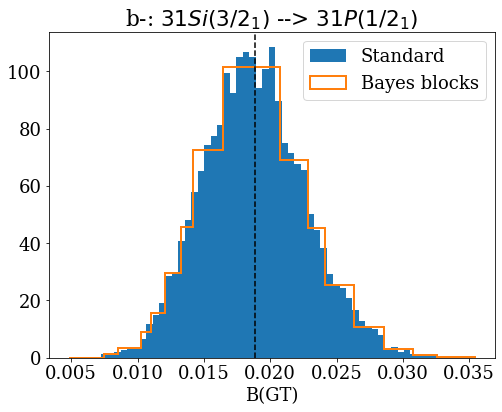

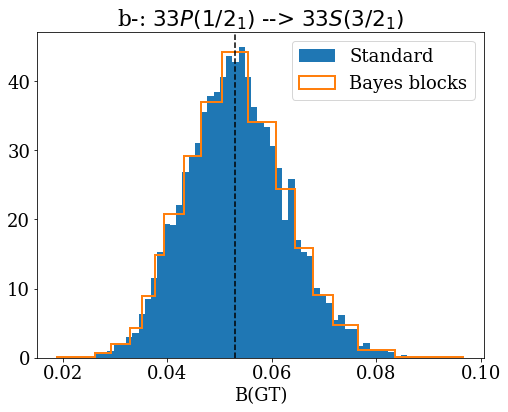

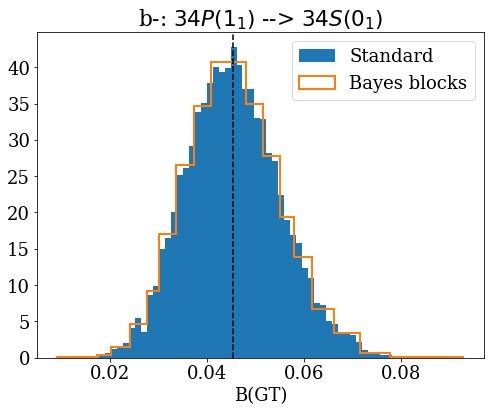

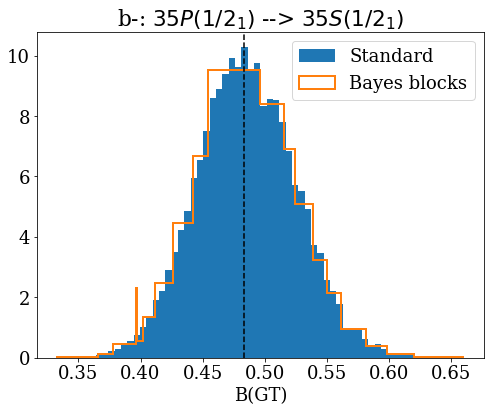

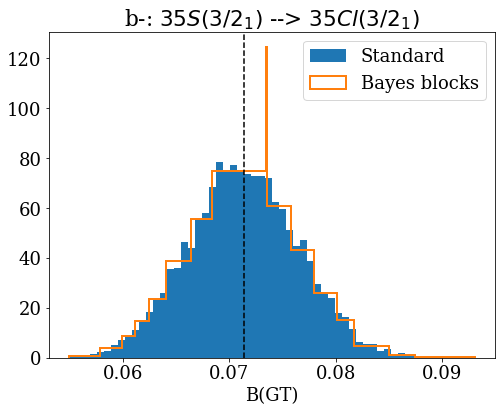

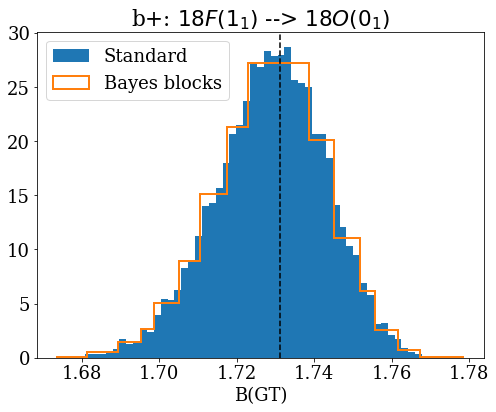

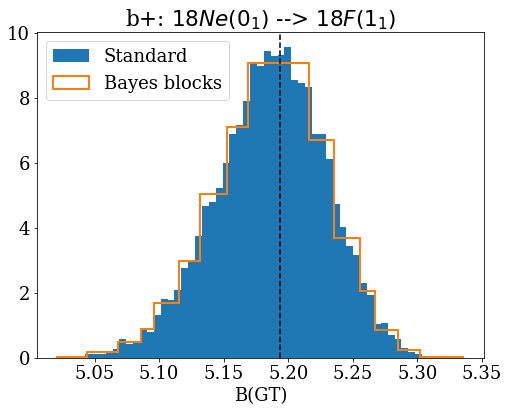

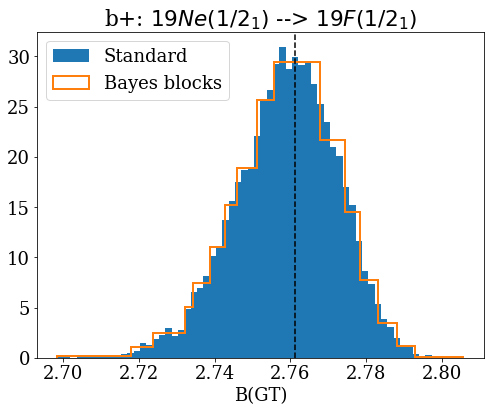

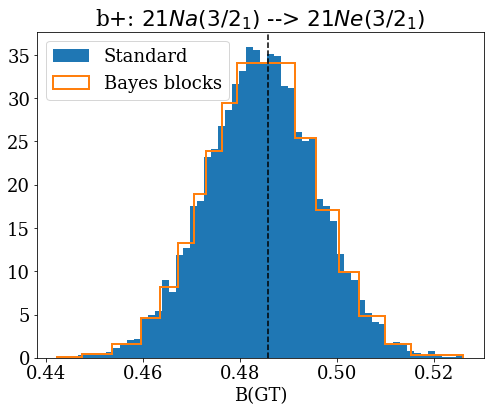

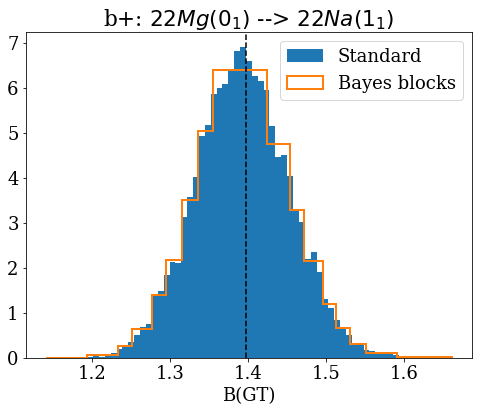

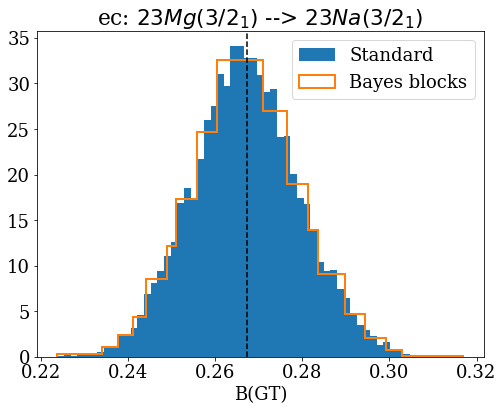

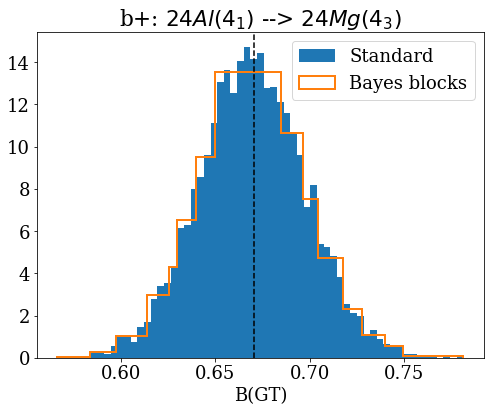

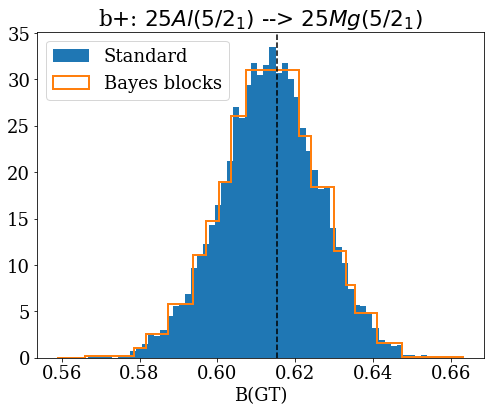

Deleting one bin: width = 0.0003944999999998533


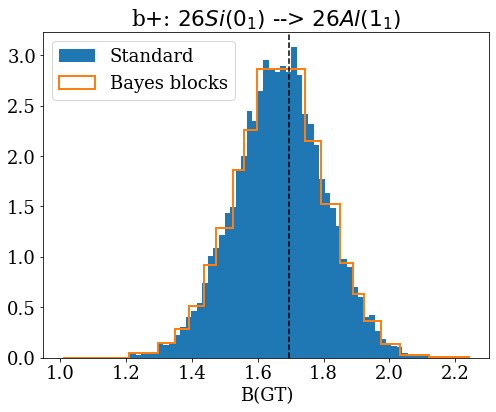

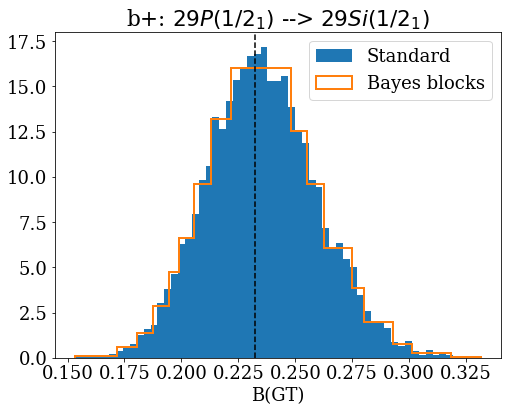

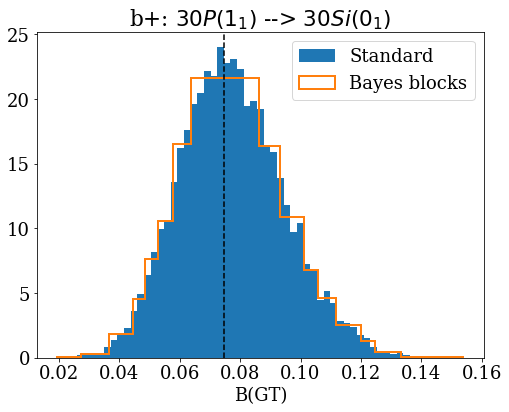

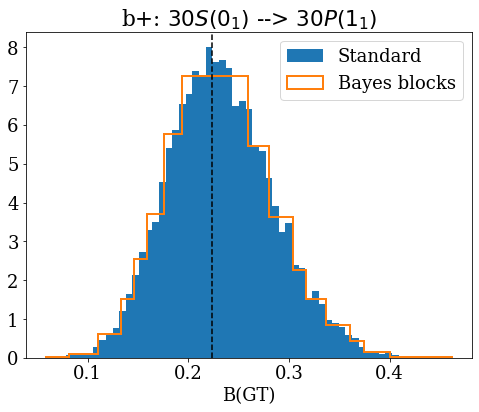

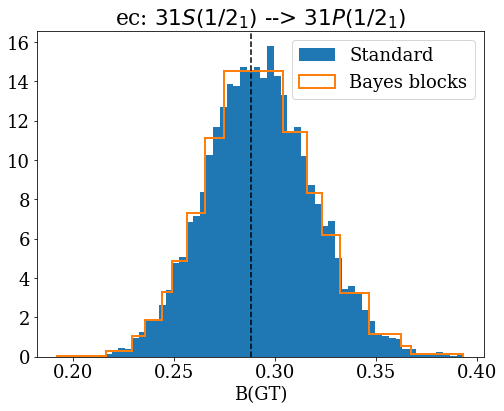

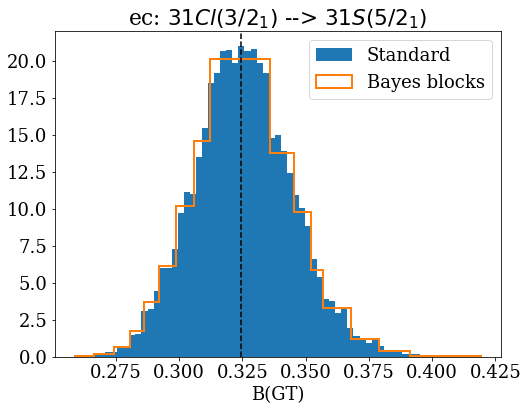

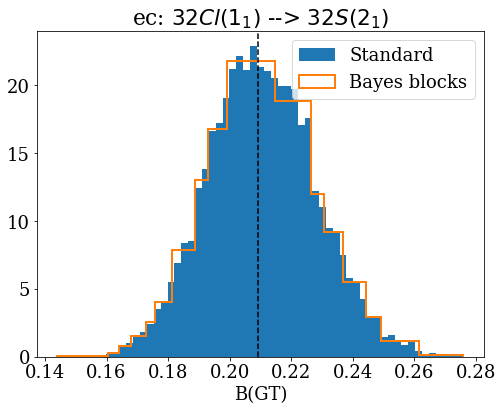

Deleting one bin: width = 8.749999999999036e-05


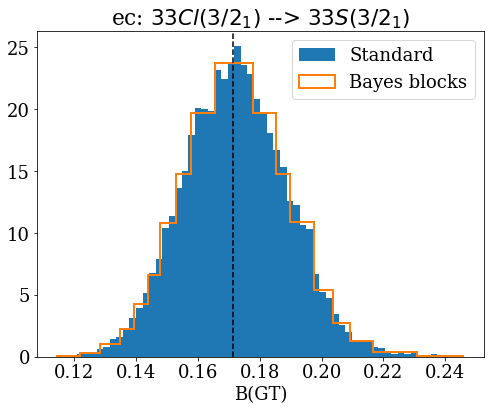

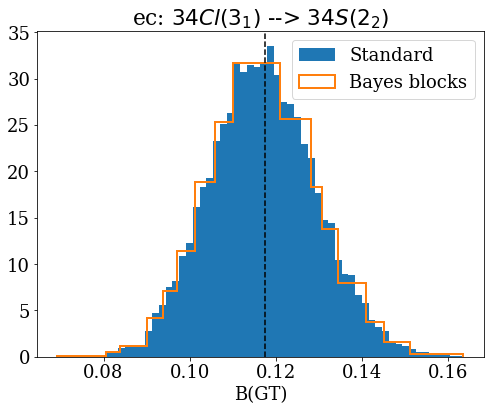

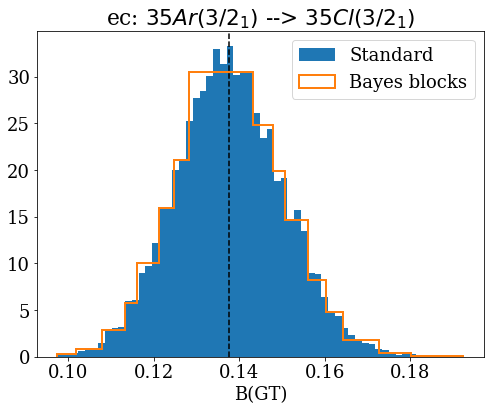

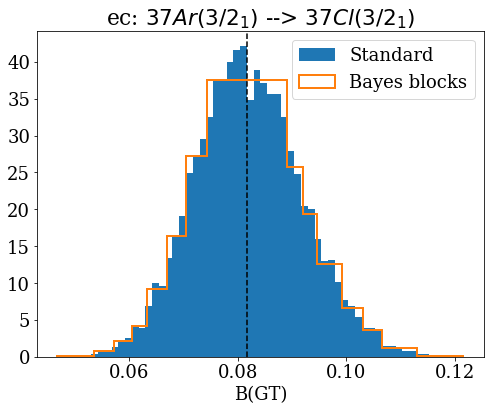

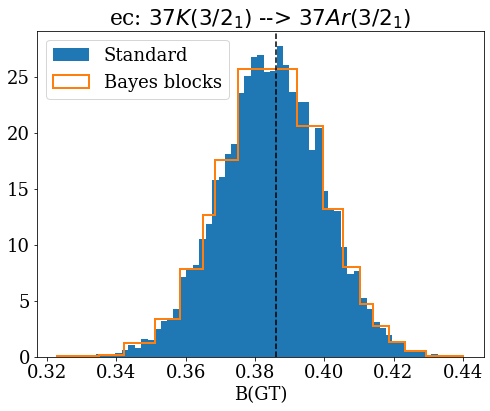

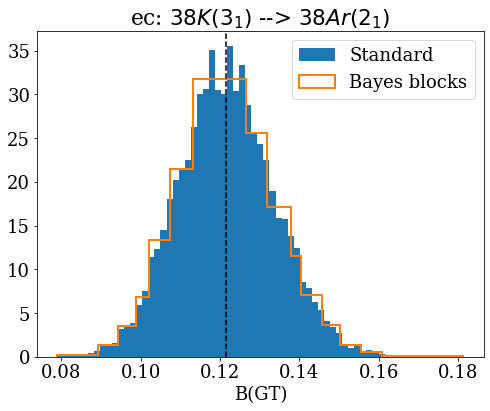

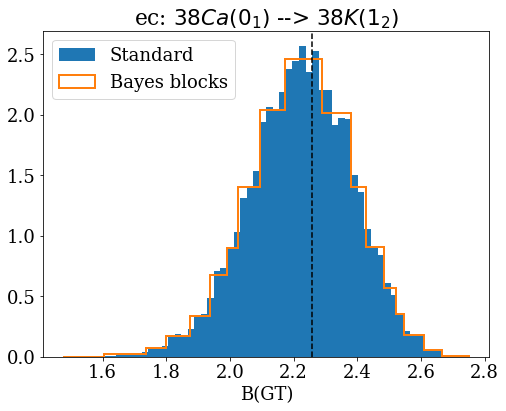

In [52]:
for ti in range(n_transitions):
    if not df_usdb.iloc[ti]['include']:
        pass
    parent = df_usdb.iloc[ti]['parent']
#     parent_mass = df_usdb.iloc[ti]['Ni'] + df_usdb.iloc[ti]['Zi']
    daughter = df_usdb.iloc[ti]['daughter']
#     daughter_mass = df_usdb.iloc[ti]['Nf'] + df_usdb.iloc[ti]['Zf']
    decay_type = df_usdb.iloc[ti]['decay']
    ji = df_usdb.iloc[ti]['Ji']
    ni = df_usdb.iloc[ti]['ni']
    jf = df_usdb.iloc[ti]['Jf']
    nf = df_usdb.iloc[ti]['nf']
    Bexp = df_usdb.iloc[ti]['Bexp']
    Bexp_unc = df_usdb.iloc[ti]['sigma_B']
    Bth_vec = [df_dict[run_num_string].iloc[ti]['Bth'] for run_num_string in list(df_dict.keys()) ]
#     for run_num_string in list(df_dict.keys()):
#         Bth_vec.append(df_dict[run_num_string].iloc[ti]['Bth'])

    plt.figure(figsize=(8,6))
    plt.hist(Bth_vec,optimal_n_bins(Bth_vec),density=True,label='Standard')
    blocks = bayesian_blocks_mod(Bth_vec)
    plt.hist(Bth_vec, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks')
    title_string = fr'{decay_type}: ${parent}({ji}_{ni})$ --> ${daughter}({jf}_{nf})$'
    plt.title(title_string)
    plt.xlabel('B(GT)')
    plt.axvline(df_usdb['Bth'].iloc[ti],c='k',ls='--')
    plt.legend()
    plt.show()
    
    

In [19]:
def loss(q,df):
    return np.sum((df['Bexp']-q**2*df['Bth_gA2']-1.0*df['Tmirror'])**2/(df['sigma_B']**2 + dBap**2))

In [20]:
# from tqdm import tqdm
# fit_list = []
# for df in tqdm(df_dict.values()):
#     df['Bth_gA2'] = df['Bth']*gA**2
#     df['Berr_gA2'] = df['Bexp']-df['Bth_gA2']-1.0*df['Tmirror']
#     df['Berr'] = df['Bexp']-df['Bth']-1.0*df['Tmirror']
#     df['Bresid'] = df['Berr']/np.sqrt(df['sigma_B']**2 + dBap**2)
#     df['Bresid_gA2'] = (df['Bexp']-df['Bth_gA2']-1.0*df['Tmirror'])/np.sqrt(df['sigma_B']**2 + dBap**2)
# #     fit_list.append(minimize_scalar(loss,args=df))
#     fit_list.append(minimize(loss,x0=0.5,args=(df)))
# q_list = [f.x[0] for f in fit_list]

In [33]:
from tqdm import tqdm
# fit_list = []
for df in tqdm(df_dict.values()):
    df['Bth_gA2'] = df['Bth']*gA**2
    df['Berr_gA2'] = df['Bexp']-df['Bth_gA2']-1.0*df['Tmirror']
    df['Berr'] = df['Bexp']-df['Bth']-1.0*df['Tmirror']
    df['Bresid'] = df['Berr']/np.sqrt(df['sigma_B']**2 + dBap**2)
    df['Bresid_gA2'] = (df['Bexp']-df['Bth_gA2']-1.0*df['Tmirror'])/np.sqrt(df['sigma_B']**2 + dBap**2)
#     fit_list.append(minimize_scalar(loss,args=df))
#     fit_list.append(minimize(loss,x0=0.5,args=(df)))
# q_list = [f.x[0] for f in fit_list]

100%|██████████| 9997/9997 [00:56<00:00, 178.39it/s]


In [22]:
# with open('quenching_factor_210224.pkl','wb') as fh:
#     pkl.dump(np.array(q_list),fh)
with open('quenching_factor_210224.pkl','rb') as fh:
    q_list = pkl.load(fh)

### Quenching factor distribution

Deleting one bin: width = 1.944446014756629e-06


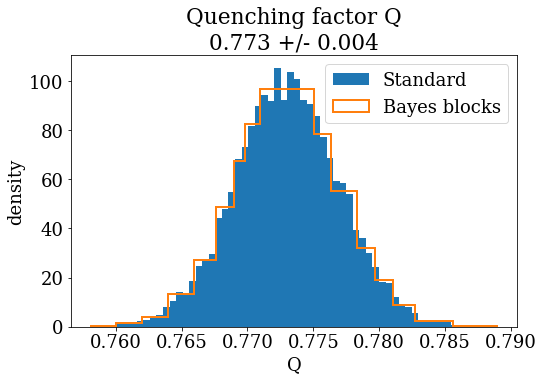

In [28]:
plt.figure(figsize=(8,5))
plt.hist(q_list,bins=optimal_n_bins(q_list),density=True,label='Standard')
blocks = bayesian_blocks_mod(q_list)
plt.hist(q_list, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks')
q_mean = np.mean(q_list)
q_std = np.std(q_list)
plt.title(f"Quenching factor Q\n{q_mean:5.3} +/- {q_std:5.3}")
plt.xlabel('Q')
plt.ylabel('density')
plt.legend()
plt.show()

### B(GT) histograms, comparison w/ experiment
Each plot shows the shell-model distribution in blue, the USDB prediction in black (with standard deviation given by the distribution, and the experimental value in red.
Note that the uncertainty bands on experiment only include the tabulated experimental uncertainty from the data library and leave out our a priori uncertainty used in the determinaton of the quenching factor.

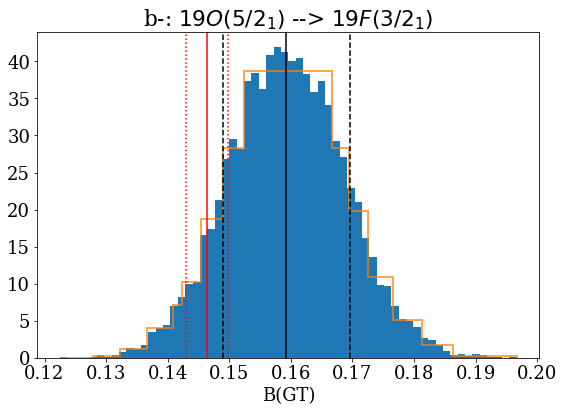

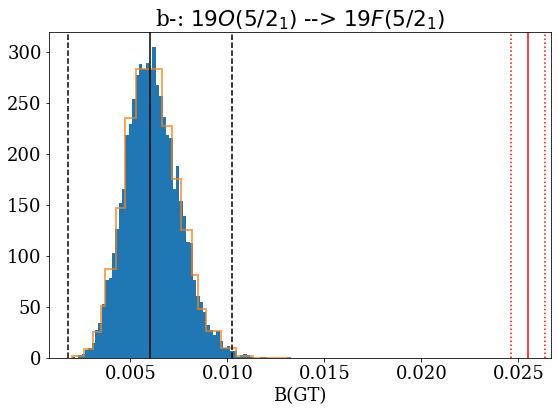

Deleting one bin: width = 0.00034316098860887045
Deleting one bin: width = 2.937183925322273e-05


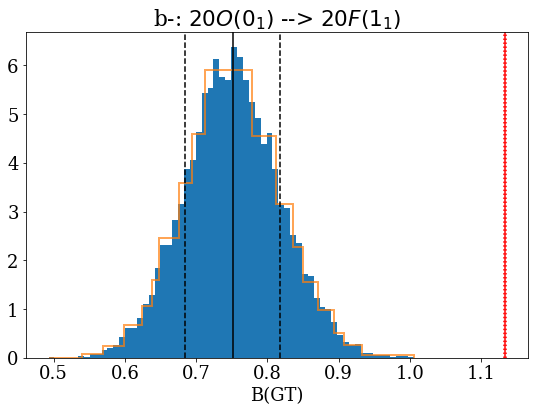

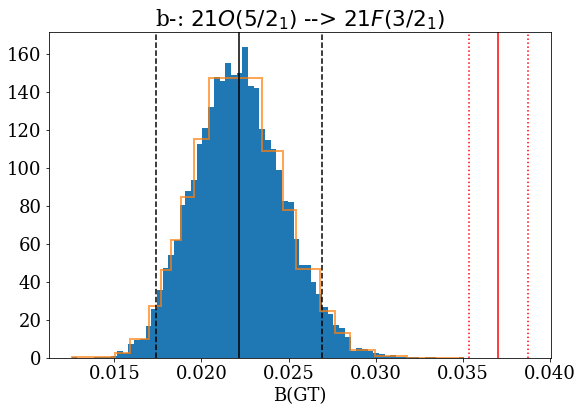

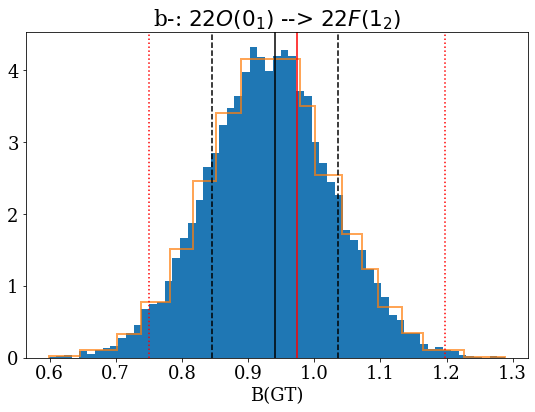

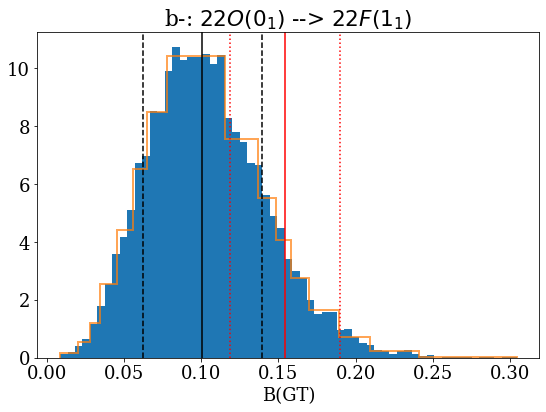

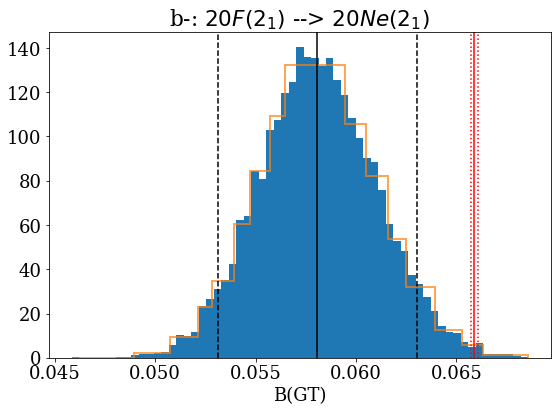

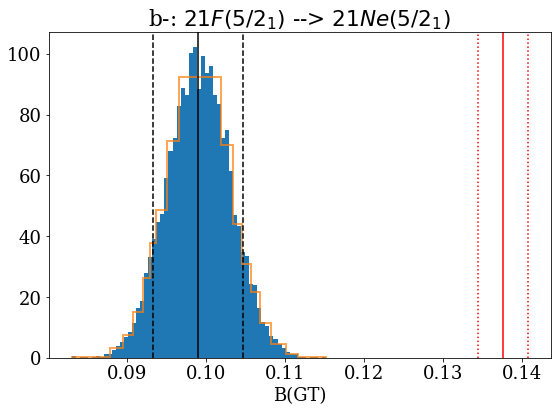

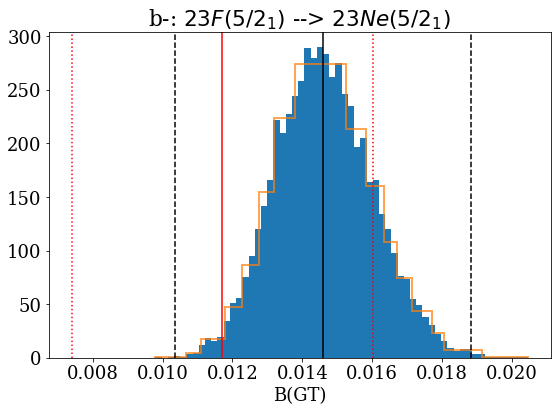

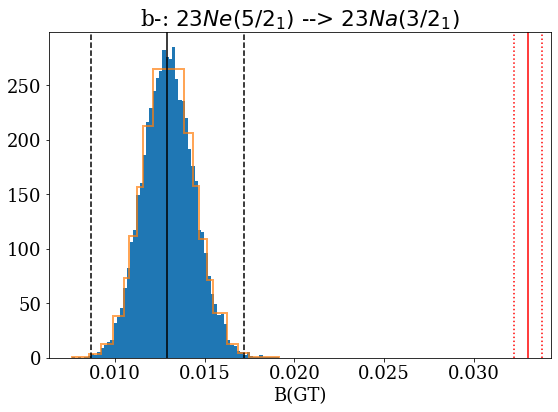

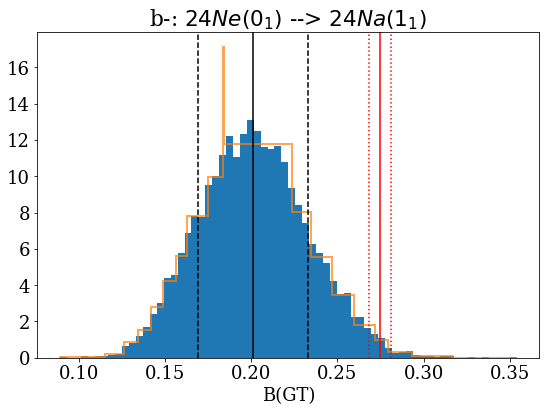

Deleting one bin: width = 1.419638897245945e-05


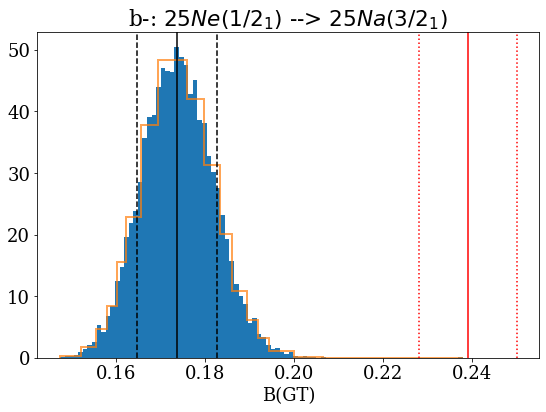

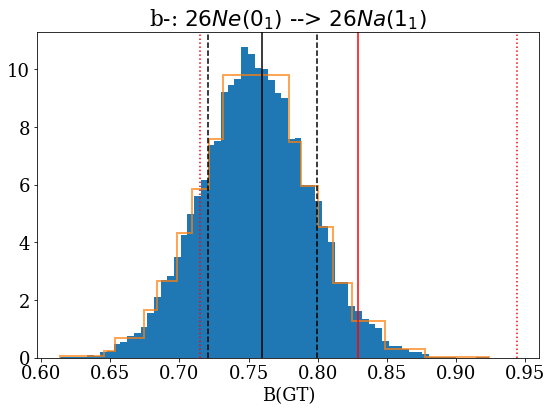

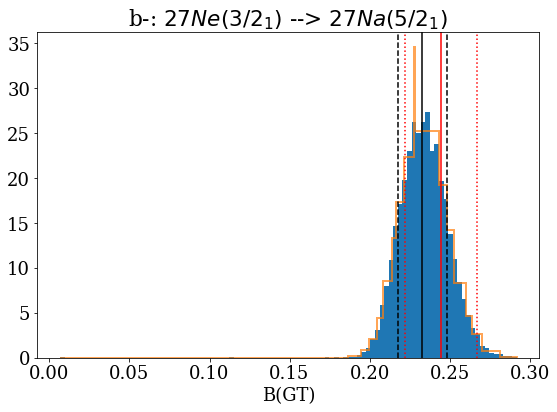

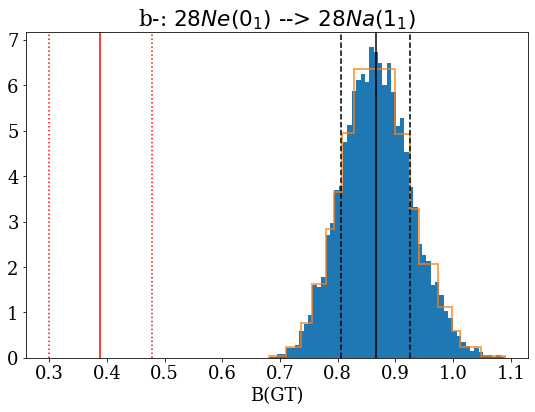

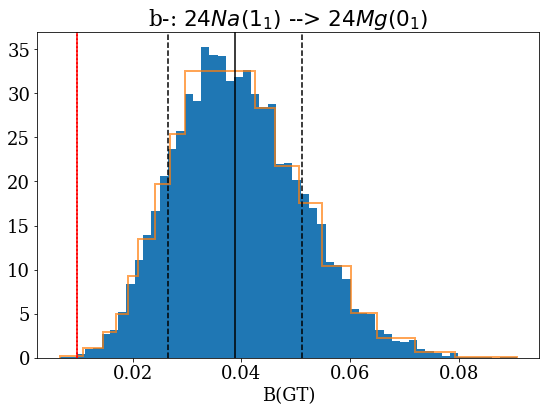

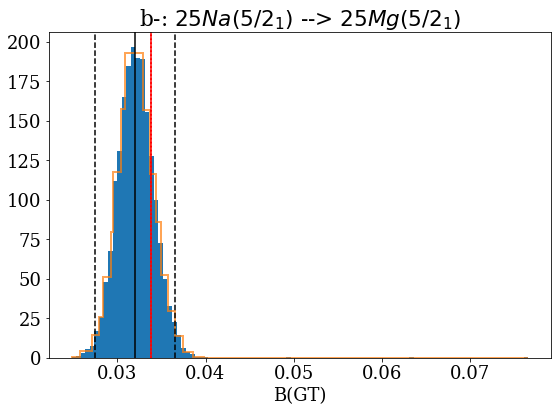

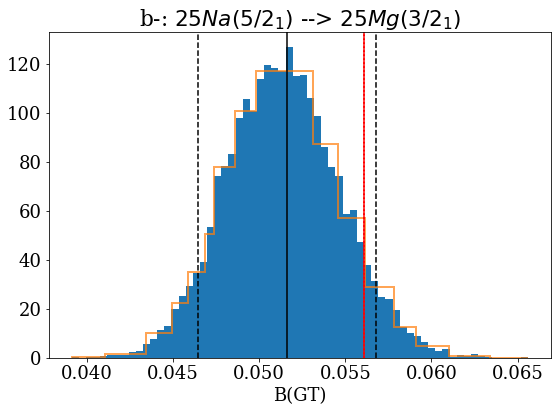

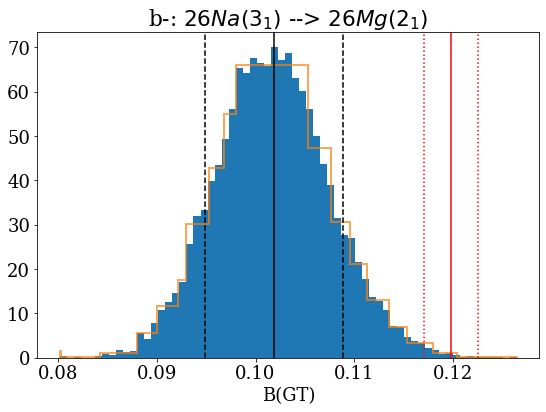

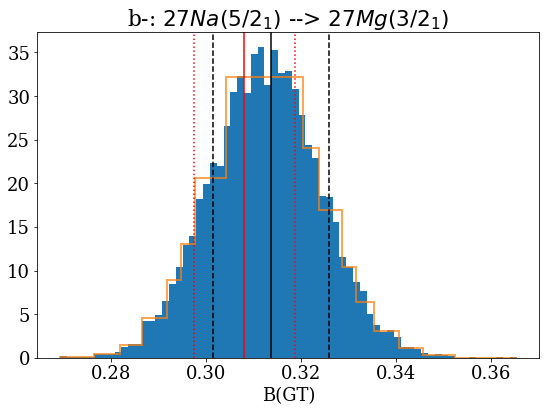

Deleting one bin: width = 2.54555940194523e-05


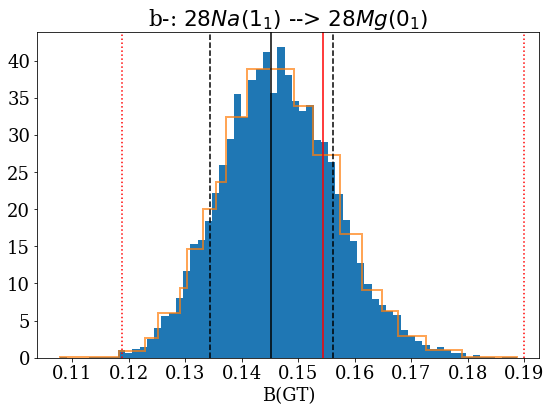

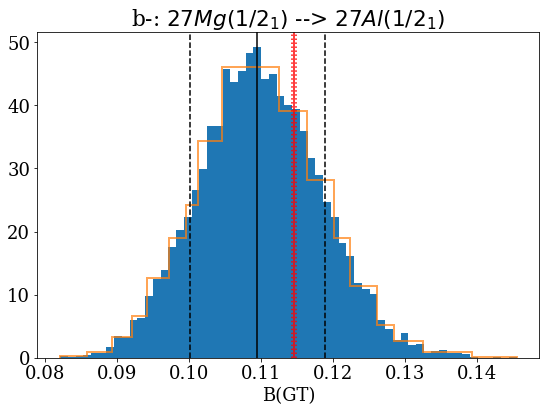

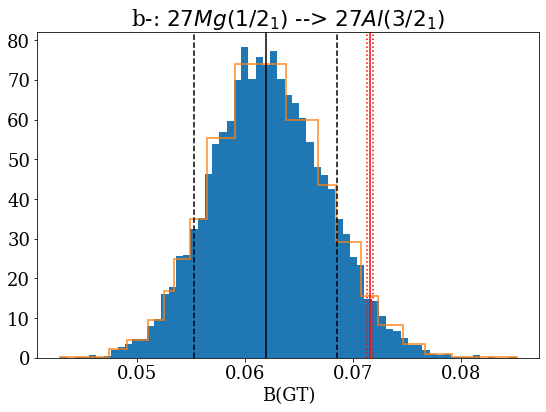

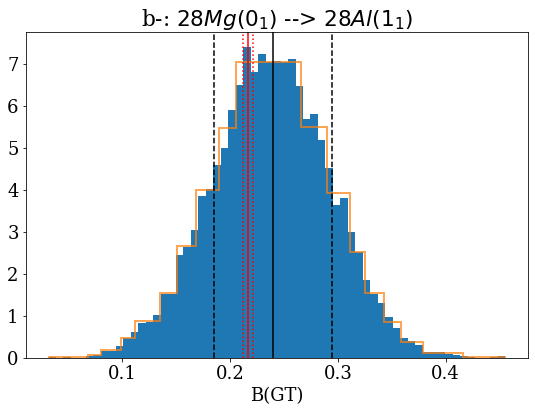

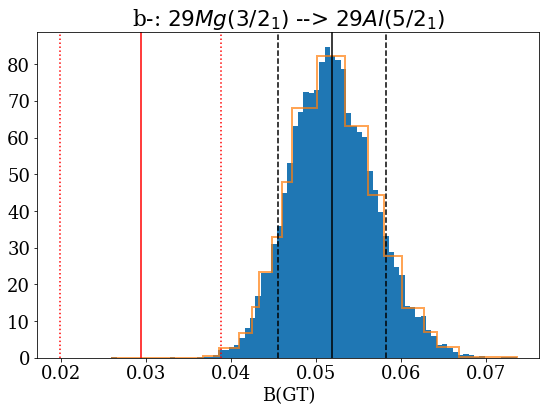

Deleting one bin: width = 1.174873570130226e-05
Deleting one bin: width = 0.0002751162276721647
Deleting one bin: width = 6.95133528993766e-05
Deleting one bin: width = 1.8602164860381798e-05


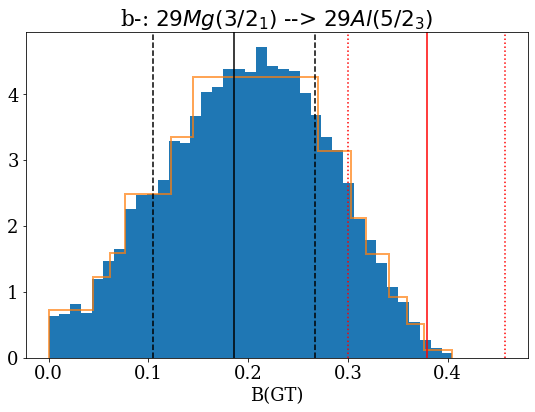

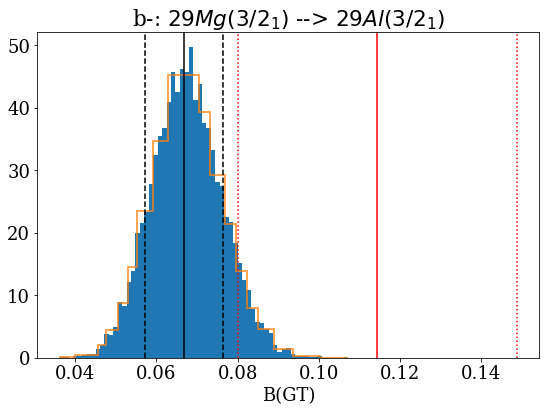

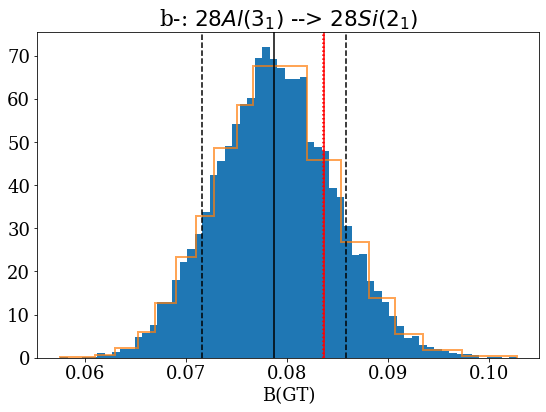

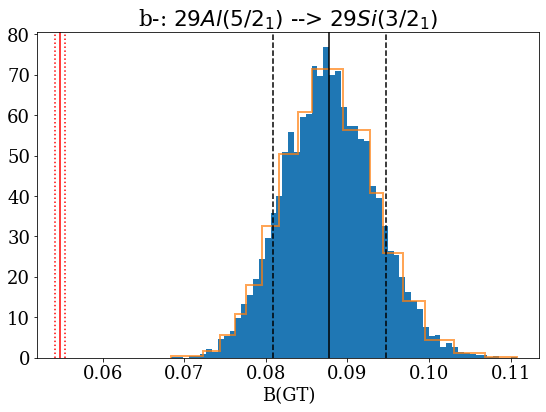

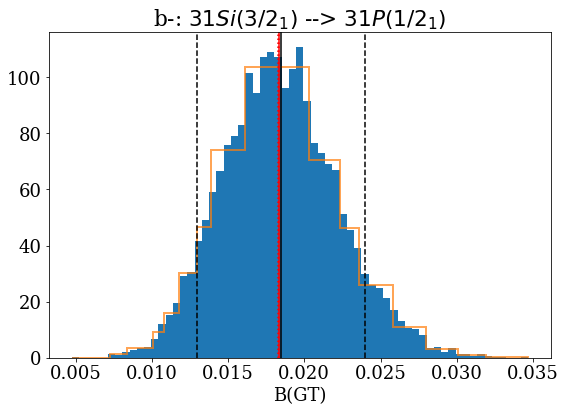

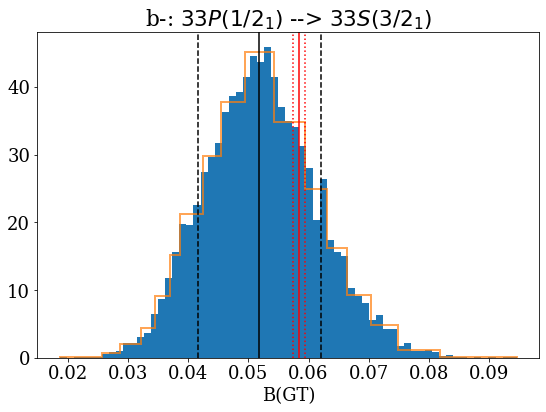

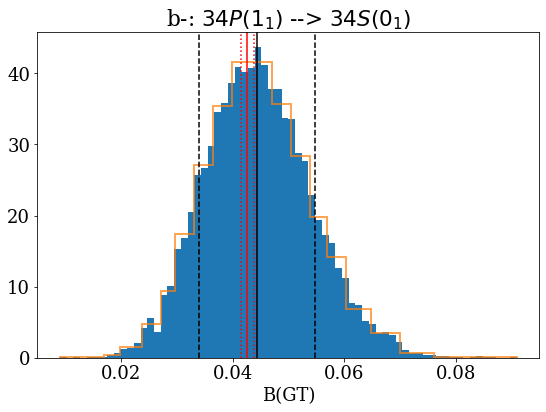

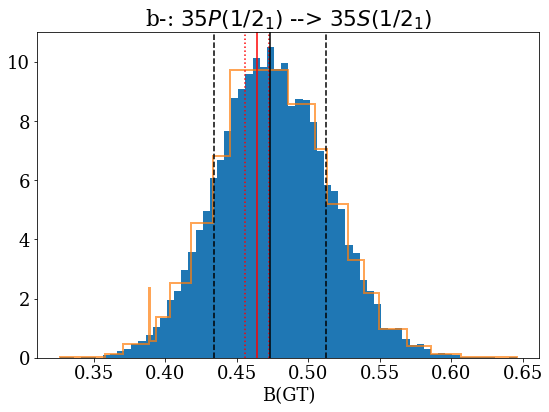

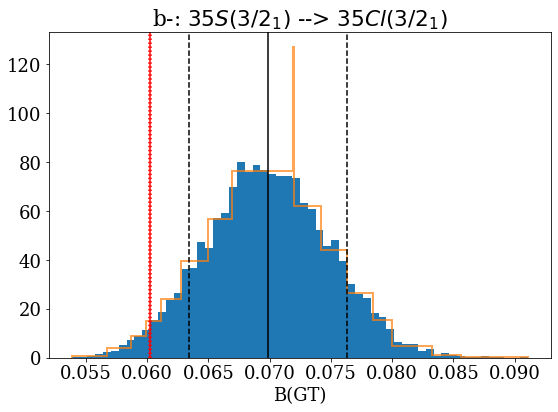

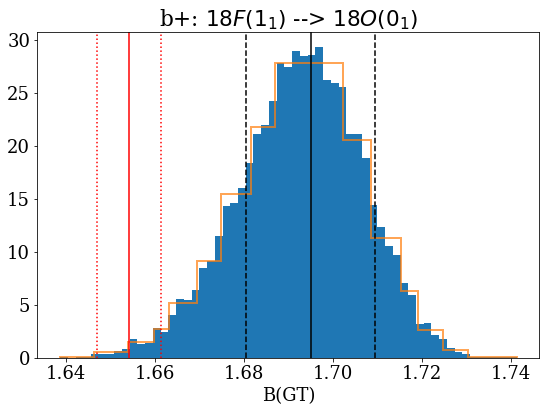

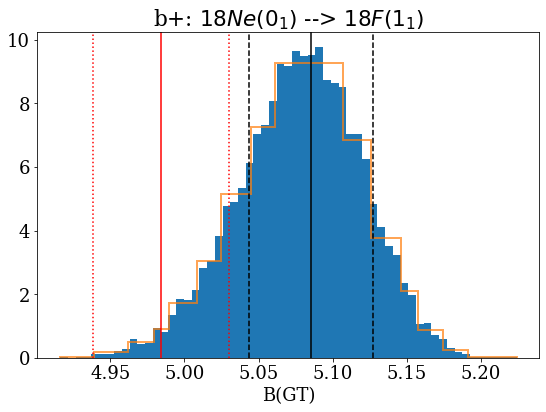

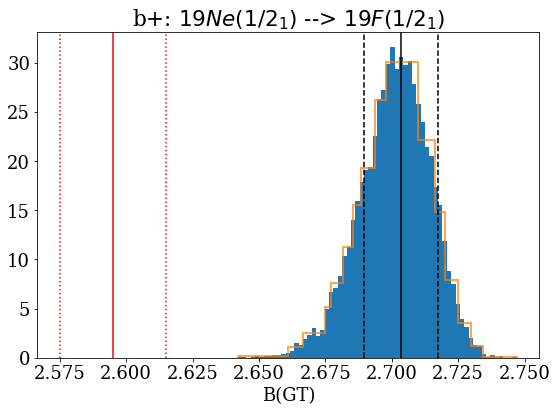

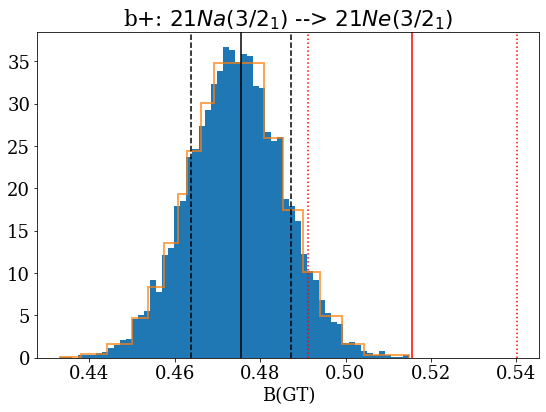

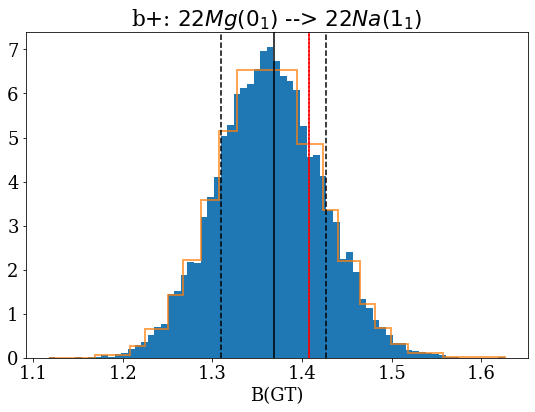

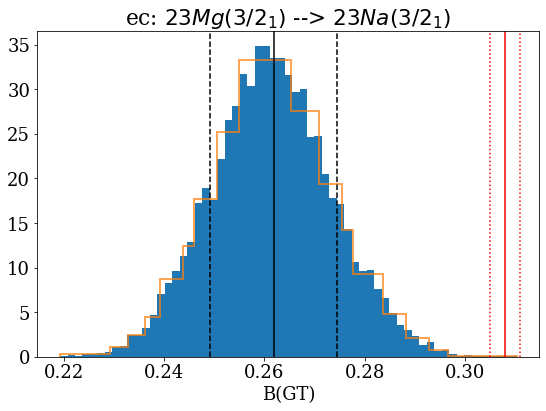

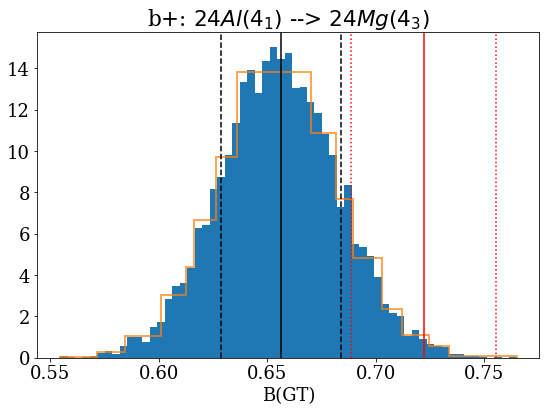

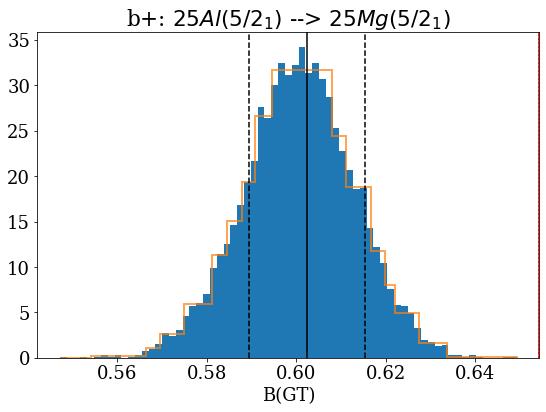

Deleting one bin: width = 0.00038623968618045623


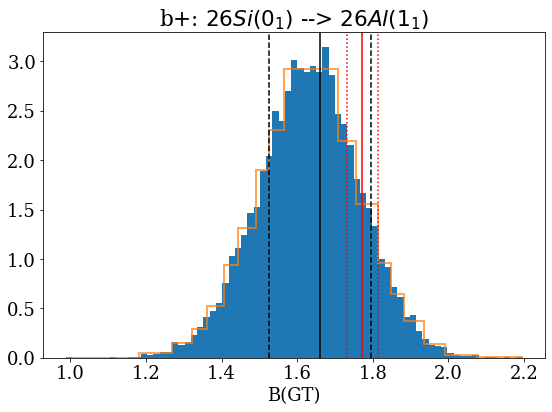

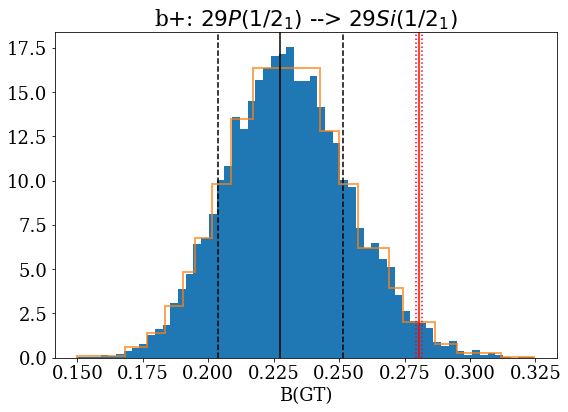

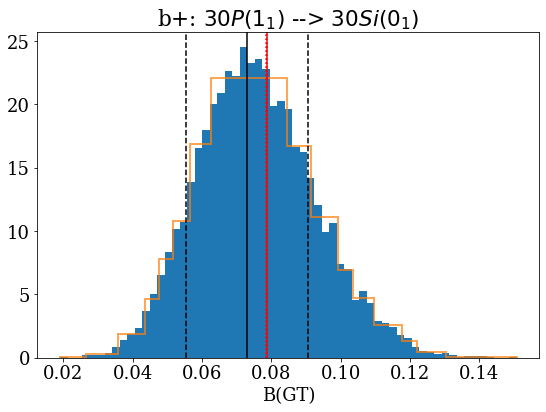

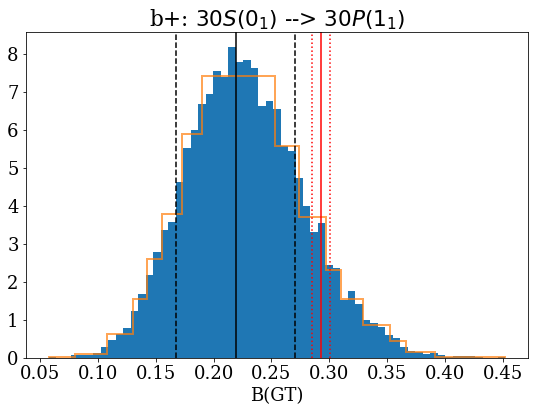

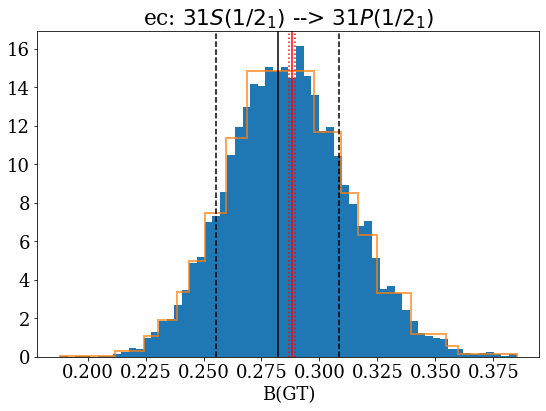

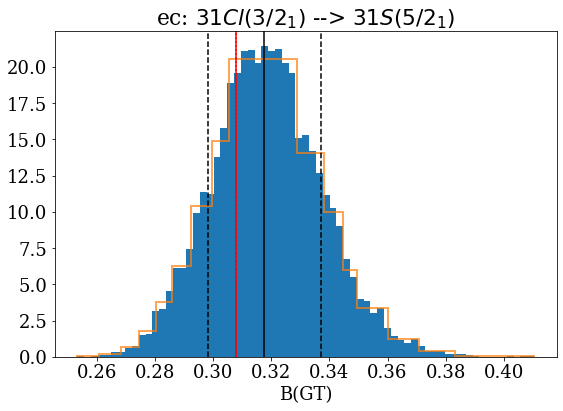

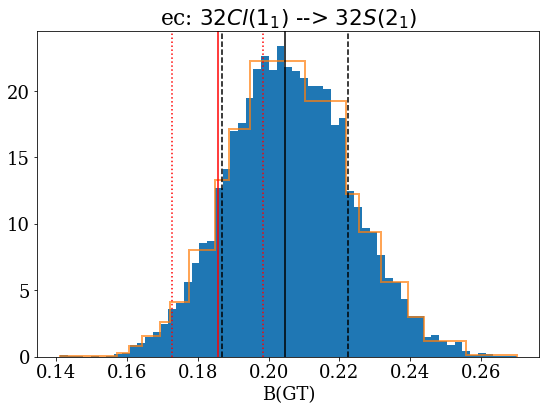

Deleting one bin: width = 8.566786448865882e-05


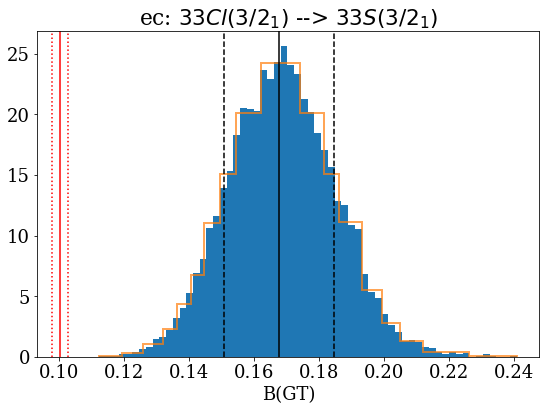

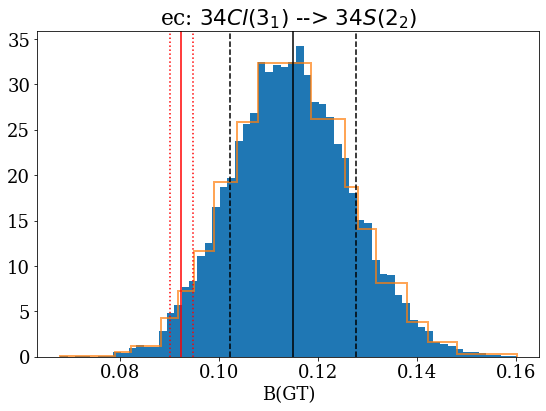

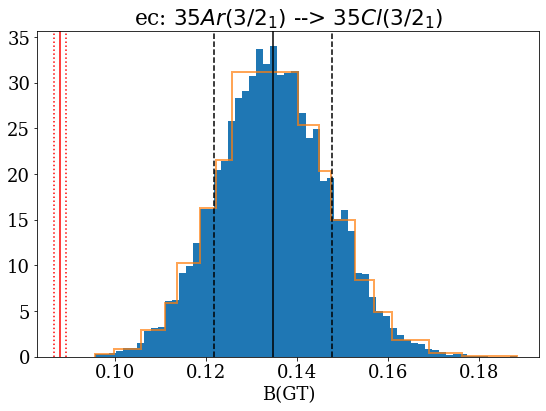

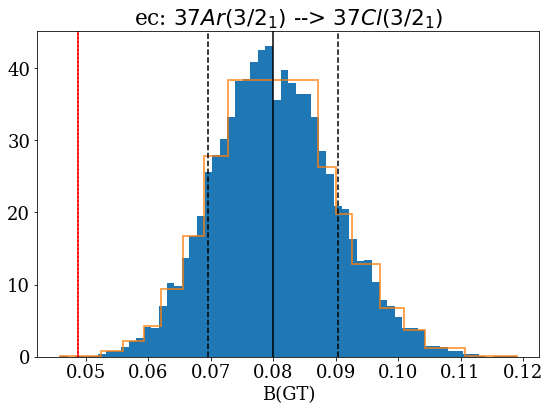

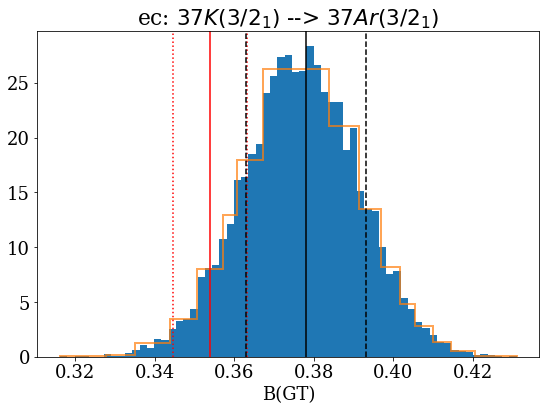

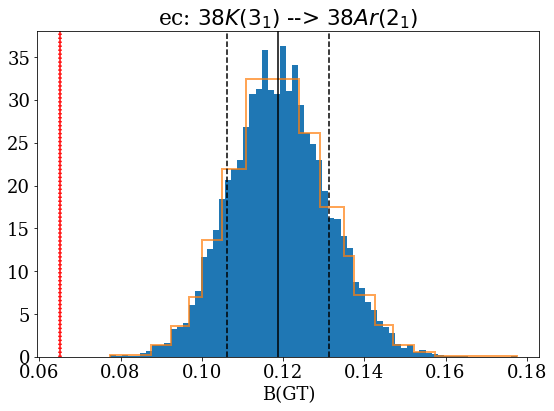

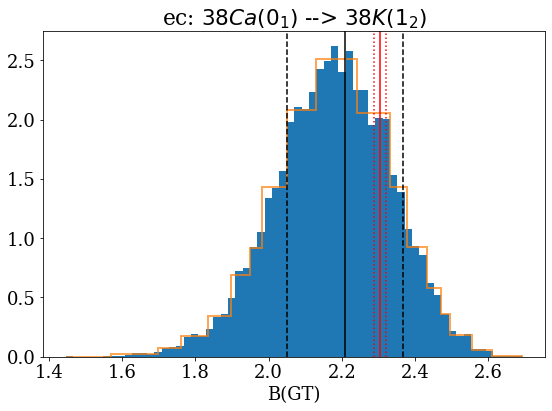

In [35]:
from scipy.stats import skew

skew_array = np.full((n_transitions,2),None)
for ti in range(n_transitions):
    if not df_usdb.iloc[ti]['include']:
        pass
    parent = df_usdb.iloc[ti]['parent']
#     parent_mass = df_usdb.iloc[ti]['Ni'] + df_usdb.iloc[ti]['Zi']
    daughter = df_usdb.iloc[ti]['daughter']
#     daughter_mass = df_usdb.iloc[ti]['Nf'] + df_usdb.iloc[ti]['Zf']
    decay_type = df_usdb.iloc[ti]['decay']
    ji = df_usdb.iloc[ti]['Ji']
    ni = df_usdb.iloc[ti]['ni']
    jf = df_usdb.iloc[ti]['Jf']
    nf = df_usdb.iloc[ti]['nf']
    
    Bexp = df_usdb.iloc[ti]['Bexp'] - 1.0*df_usdb.iloc[ti]['Tmirror']
    
#     Bexp_unc = np.sqrt(df_usdb.iloc[ti]['sigma_B']**2 + dBap**2)
    Bexp_unc = df_usdb.iloc[ti]['sigma_B']
    
    Bth_vec = np.array([df_dict[run_num_string].iloc[ti]['Bth_gA2'] for run_num_string in list(df_dict.keys()) ])
#     for run_num_string in list(df_dict.keys()):
#         Bth_vec.append(df_dict[run_num_string].iloc[ti]['Bth'])
    Bth_vec *= q_mean**2
    Bth_usdb = q_mean**2 * df_usdb['Bth_gA2'].iloc[ti]
    Bth_unc = np.sqrt(np.std(Bth_vec)**2 + q_std**2)   ## CHECK DERIVATION
    
    plt.figure(figsize=(9,6))
    plt.hist(Bth_vec,optimal_n_bins(Bth_vec), density=True, label='Standard')
    blocks = bayesian_blocks_mod(Bth_vec)
    plt.hist(Bth_vec, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks',alpha=0.7)
    title_string = fr'{decay_type}: ${parent}({ji}_{ni})$ --> ${daughter}({jf}_{nf})$'
    plt.title(title_string)
    plt.xlabel('B(GT)')
    
    plt.axvline(Bexp,c='r',ls='-')
    plt.axvline(Bexp+Bexp_unc,c='r',ls=':')
    plt.axvline(Bexp-Bexp_unc,c='r',ls=':')
    
    plt.axvline(Bth_usdb,c='k',ls='-')
    plt.axvline(Bth_usdb+Bth_unc,c='k',ls='--')
    plt.axvline(Bth_usdb-Bth_unc,c='k',ls='--')
    
    plt.show()
    
    
    if 'b-' in decay_type:
        skew_array[ti,:] = np.array([skew(Bth_vec),-1])
    else:
        skew_array[ti,:] = np.array([skew(Bth_vec),+1])

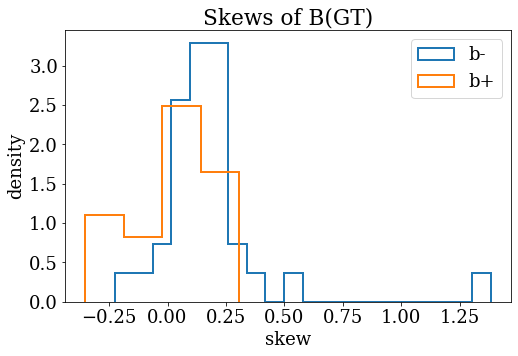

b- mean skew =  0.178351674757888
b+ mean skew =  0.04908937615057414
total mean skew =  0.12757005744787184


In [55]:
skew_bm = skew_array[skew_array[:,1]<0,0]
skew_bp = skew_array[skew_array[:,1]>0,0]

plt.figure(figsize=(8,5))
plt.hist(skew_bm,bins=optimal_n_bins(skew_bm),density=True,label='b-',histtype='step',linewidth=2)
plt.hist(skew_bp,bins=optimal_n_bins(skew_bp),density=True,label='b+',histtype='step',linewidth=2)
# plt.hist(skew_bm,bins=bayesian_blocks_mod(skew_bm),density=True,label='b-',histtype='step',linewidth=2)
# plt.hist(skew_bp,bins=bayesian_blocks_mod(skew_bp),density=True,label='b+',histtype='step',linewidth=2)
plt.title('Skews of B(GT)')
plt.xlabel('skew')
plt.ylabel('density')
plt.legend()
plt.show()

print('b- mean skew = ', np.mean(skew_bm))
print('b+ mean skew = ', np.mean(skew_bp))
print('total mean skew = ', np.mean(skew_array[:,0]))